# Applied Data Science Capstone - The Battle of Neighborhoods

#### Problem Statement: 
> In this project we will try to find a good place to **retire in California**. Ideally a place that has diverse population and lots of parks and cafes. Also, with low crime rate.
>
> As there are more attributes to a county that average person’s mind can handle, we need to utilize the tools of data science to figure this out. 

#### Data: 

> In order to find an optimal solution for our problem we need to find out the following:
> - Demographic information for each County in California
> - Crime rate for each County in California
> - Popular venues that people visit in each County in California
> 
> I identified the following data sources to get the above mentioned data
>
> - Demographic data can be obtained from Census Data that can be found in https://data.census.gov 
> - Crime rate can be determined using various data sets available in Open Justice Project that can be found in https://openjustice.doj.ca.gov/data 
> - The popular venues can be found using Foursquare API

## Segmenting California Counties by Demographics, Crime and Social Life (Popular Forur Square Venues) 

> ### Demographics: Census Data
>
> ### Crime: Justice Data 
>
> ### Social Life: Venues data from Foursquare

# Table of Contents <a id = "toc" ></a>

## <a href="#1">1. Import Libraries</a>

## <a href="#2">2. Download, Cleanup, Normailze and Cluster Census Data</a>

### &nbsp;&nbsp; <a href="#2.1">2.1 Data Source - Census Data</a>
### &nbsp;&nbsp;<a href="#2.2">2.2 Data Cleanup - Census Data</a>
### &nbsp;&nbsp;&nbsp;&nbsp;<a href="#2.2.1">2.2.1 Cleanup Invalid Columns</a>
### &nbsp;&nbsp;&nbsp;&nbsp;<a href="#2.2.2">2.2.2 Cleanup Invalid Rows</a>
### &nbsp;&nbsp;&nbsp;&nbsp;<a href="#2.2.3">2.2.3 Cleanup Invalid Data Cells</a>
### &nbsp;&nbsp;&nbsp;&nbsp;<a href="#2.2.4">2.2.4 Cleanup Column Data Types</a>
### &nbsp;&nbsp;<a href="#2.3">2.3 Normalize Data - Census Data</a>
### &nbsp;&nbsp;<a href="#2.4">2.4 Get longitude and latitude for each County</a>
### &nbsp;&nbsp;<a href="#2.5">2.5 Cluster California Counties based on Census Data </a>
### &nbsp;&nbsp;<a href="#2.6">2.6 Visualize Cluster based on Census Data</a>
### &nbsp;&nbsp;<a href="#2.7">2.7 Explore Clusters - Census Data</a>

## <a href="#3">3. Download, Cleanup, Normailze and Cluster with Justice Data</a>
### &nbsp;&nbsp; <a href="#3.1">3.1 Data Source - Open Justice Data</a>
### &nbsp;&nbsp; &nbsp;&nbsp; <a href="#3.1.1">3.1.1 Get County Codes (Metadata ) </a>
### &nbsp;&nbsp; &nbsp;&nbsp; <a href="#3.1.2">3.1.2 Get Domestic Violence Related Calls for Service counts by county</a>
### &nbsp;&nbsp; &nbsp;&nbsp; <a href="#3.1.3">3.1.3 Get Total Number of Victims of Hate Crime by county</a>
### &nbsp;&nbsp; &nbsp;&nbsp; <a href="#3.1.4">3.1.4 Get Arrest counts by county</a>
### &nbsp;&nbsp; &nbsp;&nbsp; <a href="#3.1.5">3.1.5 Get Violent Crimes Committed Against Senior Citizens (VCASC) counts by county</a>
### &nbsp;&nbsp; <a href="#3.2">3.2 Normailze Justice Data Using Simple Feature Scaling</a>
### &nbsp;&nbsp; <a href="#3.3">3.3 Cluster California Counties based on Census Data and Open Justice Data</a>
### &nbsp;&nbsp; <a href="#3.4">3.4 Visualize Cluster based on Census Data and Open Justice Data</a>
### &nbsp;&nbsp; <a href="#3.5">3.5 Explore Clusters - Census Data and Open Justice Data</a>

## <a href="#4">4. Construct, Cleanup, Normalize and Cluster Venue / Location Data</a>
### &nbsp;&nbsp; <a href="#4.1">4.1 Data Source - Location Data from FourSquare</a>
### &nbsp;&nbsp; <a href="#4.2">4.2 Analyze Each County</a>
### &nbsp;&nbsp; <a href="#4.3">4.3 Prepare FourSquare data for Clustering</a>
### &nbsp;&nbsp; <a href="#4.4">4.4 Cluster with FourSquare Data</a>
### &nbsp;&nbsp; <a href="#4.5">4.5 Visualize Cluster with FourSquare Data</a>
### &nbsp;&nbsp; <a href="#4.6">4.6 Explore Clusters</a>

 ## 1. Import Libraries<a id = "1"></a> 
 <a href="#toc">(back to table of contents)</a>

In [1]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('complete')

complete


In [2]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
print('complete')

complete


In [3]:
import numpy as np # library to handle data in a vectorized manner

import urllib.request
#import bs4 as bs
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

import time

print('Libraries imported.')

Libraries imported.


## 2. Download, Cleanup, Normailze and Cluster Census Data<a id = "2"></a>

## 2.1 Data Source - Census Data <a id = "2.1"></a>
<a href="#toc">(back to table of contents)</a>

### Census Data was downloaded from https://data.census.gov 

https://data.census.gov/cedsci/table?q=United%20States&hidePreview=true&tid=ACSDT1Y2018.B01001A&vintage=2018&layer=VT_2018_050_00_PY_D1&cid=DP05_0001E&g=0100000US_0400000US06.050000&t=Age%20and%20Sex%3APopulations%20and%20People%3ARace%20and%20Ethnicity&tp=true

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8ca8fa7aa1ab43798e69f57b577f07e7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mbssyBUAoY6XLRdVwHC8j6h2b_Z6HLSBkvWnxk17ckU1',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8ca8fa7aa1ab43798e69f57b577f07e7.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-zj5htlxm9qjgp0',Key='01-ACSDP1Y2018.DP05_data_with_overlays_2020-04-24T102820.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,DP05_0003E,DP05_0003M,DP05_0003PE,DP05_0003PM,DP05_0004E,DP05_0004M,DP05_0004PE,DP05_0004PM,DP05_0005E,DP05_0005M,DP05_0005PE,DP05_0005PM,DP05_0006E,DP05_0006M,DP05_0006PE,DP05_0006PM,DP05_0007E,DP05_0007M,DP05_0007PE,DP05_0007PM,DP05_0008E,DP05_0008M,DP05_0008PE,DP05_0008PM,DP05_0009E,DP05_0009M,DP05_0009PE,DP05_0009PM,DP05_0010E,DP05_0010M,DP05_0010PE,DP05_0010PM,DP05_0011E,DP05_0011M,DP05_0011PE,DP05_0011PM,DP05_0012E,DP05_0012M,DP05_0012PE,DP05_0012PM,DP05_0013E,DP05_0013M,DP05_0013PE,DP05_0013PM,DP05_0014E,DP05_0014M,DP05_0014PE,DP05_0014PM,DP05_0015E,DP05_0015M,DP05_0015PE,DP05_0015PM,DP05_0016E,DP05_0016M,DP05_0016PE,DP05_0016PM,DP05_0017E,DP05_0017M,DP05_0017PE,DP05_0017PM,DP05_0018E,DP05_0018M,DP05_0018PE,DP05_0018PM,DP05_0019E,DP05_0019M,DP05_0019PE,DP05_0019PM,DP05_0020E,DP05_0020M,DP05_0020PE,DP05_0020PM,DP05_0021E,DP05_0021M,DP05_0021PE,DP05_0021PM,DP05_0022E,DP05_0022M,DP05_0022PE,DP05_0022PM,DP05_0023E,DP05_0023M,DP05_0023PE,DP05_0023PM,DP05_0024E,DP05_0024M,DP05_0024PE,DP05_0024PM,DP05_0025E,DP05_0025M,DP05_0025PE,DP05_0025PM,DP05_0026E,DP05_0026M,DP05_0026PE,DP05_0026PM,DP05_0027E,DP05_0027M,DP05_0027PE,DP05_0027PM,DP05_0028E,DP05_0028M,DP05_0028PE,DP05_0028PM,DP05_0029E,DP05_0029M,DP05_0029PE,DP05_0029PM,DP05_0030E,DP05_0030M,DP05_0030PE,DP05_0030PM,DP05_0031E,DP05_0031M,DP05_0031PE,DP05_0031PM,DP05_0032E,DP05_0032M,DP05_0032PE,DP05_0032PM,DP05_0033E,DP05_0033M,DP05_0033PE,DP05_0033PM,DP05_0034E,DP05_0034M,DP05_0034PE,DP05_0034PM,DP05_0035E,DP05_0035M,DP05_0035PE,DP05_0035PM,DP05_0036E,DP05_0036M,DP05_0036PE,DP05_0036PM,DP05_0037E,DP05_0037M,DP05_0037PE,DP05_0037PM,DP05_0038E,DP05_0038M,DP05_0038PE,DP05_0038PM,DP05_0039E,DP05_0039M,DP05_0039PE,DP05_0039PM,DP05_0040E,DP05_0040M,DP05_0040PE,DP05_0040PM,DP05_0041E,DP05_0041M,DP05_0041PE,DP05_0041PM,DP05_0042E,DP05_0042M,DP05_0042PE,DP05_0042PM,DP05_0043E,DP05_0043M,DP05_0043PE,DP05_0043PM,DP05_0044E,DP05_0044M,DP05_0044PE,DP05_0044PM,DP05_0045E,DP05_0045M,DP05_0045PE,DP05_0045PM,DP05_0046E,DP05_0046M,DP05_0046PE,DP05_0046PM,DP05_0047E,DP05_0047M,DP05_0047PE,DP05_0047PM,DP05_0048E,DP05_0048M,DP05_0048PE,DP05_0048PM,DP05_0049E,DP05_0049M,DP05_0049PE,DP05_0049PM,DP05_0050E,DP05_0050M,DP05_0050PE,DP05_0050PM,DP05_0051E,DP05_0051M,DP05_0051PE,DP05_0051PM,DP05_0052E,DP05_0052M,DP05_0052PE,DP05_0052PM,DP05_0053E,DP05_0053M,DP05_0053PE,DP05_0053PM,DP05_0054E,DP05_0054M,DP05_0054PE,DP05_0054PM,DP05_0055E,DP05_0055M,DP05_0055PE,DP05_0055PM,DP05_0056E,DP05_0056M,DP05_0056PE,DP05_0056PM,DP05_0057E,DP05_0057M,DP05_0057PE,DP05_0057PM,DP05_0058E,DP05_0058M,DP05_0058PE,DP05_0058PM,DP05_0059E,DP05_0059M,DP05_0059PE,DP05_0059PM,DP05_0060E,DP05_0060M,DP05_0060PE,DP05_0060PM,DP05_0061E,DP05_0061M,DP05_0061PE,DP05_0061PM,DP05_0062E,DP05_0062M,DP05_0062PE,DP05_0062PM,DP05_0063E,DP05_0063M,DP05_0063PE,DP05_0063PM,DP05_0064E,DP05_0064M,DP05_0064PE,DP05_0064PM,DP05_0065E,DP05_0065M,DP05_0065PE,DP05_0065PM,DP05_0066E,DP05_0066M,DP05_0066PE,DP05_0066PM,DP05_0067E,DP05_0067M,DP05_0067PE,DP05_0067PM,DP05_0068E,DP05_0068M,DP05_0068PE,DP05_0068PM,DP05_0069E,DP05_0069M,DP05_0069PE,DP05_0069PM,DP05_0070E,DP05_0070M,DP05_0070PE,DP05_0070PM,DP05_0071E,DP05_0071M,DP05_0071PE,DP05_0071PM,DP05_0072E,DP05_0072M,DP05_0072PE,DP05_0072PM,DP05_0073E,DP05_0073M,DP05_0073PE,DP05_0073PM,DP05_0074E,DP05_0074M,DP05_0074PE,DP05_0074PM,DP05_0075E,DP05_0075M,DP05_0075PE,DP05_0075PM,DP05_0076E,DP05_0076M,DP05_0076PE,DP05_0076PM,DP05_0077E,DP05_0077M,DP05_0077PE,DP05_0077PM,DP05_0078E,DP05_0078M,DP05_0078PE,DP05_0078PM,DP05_0079E,DP05_0079M,DP05_0079PE,DP05_0079PM,DP05_0080E,DP05_0080M,DP05_0080PE,DP05_0080PM,DP05_0081E,DP05_0081M,DP05_0081PE,DP05_0081PM,DP05_0082E,DP05_0082M,DP05_0082PE,DP05_0082PM,DP05_0083E,DP05_0083M,DP05_0083PE,DP05_0083PM,DP05_0084E,DP05_0084M,DP05_0084PE,DP05_0084PM,DP05_0085E,DP05_0085M,DP05_0085PE,DP05_0085PM,DP05_0086E,DP05_0086M,DP05_0086PE,DP05_0086PM,DP05_0087E,DP05_0087M,DP05_0087

## 2.2 Data Cleanup - Census Data <a id = "2.2"></a>
<a href="#toc">(back to table of contents)</a>

### 2.2.1 Cleanup Unwanted Columns <a id = "2.2.1"></a>
<a href="#toc">(back to table of contents)</a>

In [5]:
#df = df[['GEO_ID','NAME','DP05_0001E','DP05_0018E','DP05_0037E','DP05_0038E','DP05_0039E','DP05_0044E','DP05_0045E','DP05_0046E','DP05_0047E','DP05_0048E','DP05_0049E','DP05_0050E','DP05_0051E','DP05_0052E','DP05_0057E']]
df = df[['GEO_ID','NAME','DP05_0001E','DP05_0018E','DP05_0037E','DP05_0038E','DP05_0039E','DP05_0044E','DP05_0045E','DP05_0052E','DP05_0057E']]

In [6]:
df.head()

,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E
0,id,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Media...,Estimate!!RACE!!Total population!!One race!!White,Estimate!!RACE!!Total population!!One race!!Bl...,Estimate!!RACE!!Total population!!One race!!Am...,Estimate!!RACE!!Total population!!One race!!Asian,Estimate!!RACE!!Total population!!One race!!As...,Estimate!!RACE!!Total population!!One race!!Na...,Estimate!!RACE!!Total population!!One race!!So...
1,0500000US06031,"Kings County, California",151366,32.0,96634,10428,1502,6833,N,273,30198
2,0500000US06053,"Monterey County, California",435594,34.7,205303,11753,6540,25748,2492,2232,167885
3,0500000US06057,"Nevada County, California",99696,50.5,91285,534,345,1249,N,158,2207
4,0500000US06089,"Shasta County, California",180040,41.5,153562,2080,4384,5654,981,341,6307


### 2.2.2 Cleanup Invalid Rows<a id = "2.2.2"></a>
<a href="#toc">(back to table of contents)</a>

Drop row with column headers

In [7]:
# delete row with column headers
df = df.drop([0])

Drop row with values for entire United States

In [8]:
# delete row with United States values
df.drop( df.loc[df['NAME'] == 'United States'].index , inplace=True)

Reset the index after removing few rows

In [9]:
df.reset_index(inplace=True)

### 2.2.3 Cleanup Invalid Data Cells <a id = "2.2.2"></a>
<a href="#toc">(back to table of contents)</a>

Some of the population values are N in the census dataframe. Set them to zero

In [10]:
df = df.replace('N',0)

### 2.2.3 Cleanup Column Data Types<a id = "2.2.4"></a>
<a href="#toc">(back to table of contents)</a>

In [11]:
df.dtypes

index          int64
GEO_ID        object
NAME          object
DP05_0001E    object
DP05_0018E    object
DP05_0037E    object
DP05_0038E    object
DP05_0039E    object
DP05_0044E    object
DP05_0045E    object
DP05_0052E    object
DP05_0057E    object
dtype: object

In [12]:
df['DP05_0001E'] = df['DP05_0001E'].astype('float64')
df['DP05_0018E'] = df['DP05_0018E'].astype('float64')
df['DP05_0037E'] = df['DP05_0037E'].astype('float64')
df['DP05_0038E'] = df['DP05_0038E'].astype('float64')
df['DP05_0039E'] = df['DP05_0039E'].astype('float64')
df['DP05_0044E'] = df['DP05_0044E'].astype('float64')
df['DP05_0045E'] = df['DP05_0045E'].astype('float64')
#df['DP05_0046E'] = df['DP05_0046E'].astype('float64')
#df['DP05_0047E'] = df['DP05_0047E'].astype('float64')
#df['DP05_0048E'] = df['DP05_0048E'].astype('float64')
#df['DP05_0049E'] = df['DP05_0049E'].astype('float64')
#df['DP05_0050E'] = df['DP05_0050E'].astype('float64')
#df['DP05_0051E'] = df['DP05_0051E'].astype('float64')
df['DP05_0052E'] = df['DP05_0052E'].astype('float64')
df['DP05_0057E'] = df['DP05_0057E'].astype('float64')

### 2.3 Normalize Data - Census Data <a id = "2.3"></a>
<a href="#toc">(back to table of contents)</a>

Keep copy of original values 

In [13]:
df['oDP05_0001E'] = df['DP05_0001E']
df['oDP05_0018E'] = df['DP05_0018E']
df['oDP05_0037E'] = df['DP05_0037E']
df['oDP05_0038E'] = df['DP05_0038E']
df['oDP05_0039E'] = df['DP05_0039E']
df['oDP05_0044E'] = df['DP05_0044E']
df['oDP05_0045E'] = df['DP05_0045E']
#df['oDP05_0046E'] = df['DP05_0046E']
#df['oDP05_0047E'] = df['DP05_0047E']
#df['oDP05_0048E'] = df['DP05_0048E']
#df['oDP05_0049E'] = df['DP05_0049E']
#df['oDP05_0050E'] = df['DP05_0050E']
#df['oDP05_0051E'] = df['DP05_0051E']
df['oDP05_0052E'] = df['DP05_0052E']
df['oDP05_0057E'] = df['DP05_0057E']

Convert Demographic Population to Percentage instead of Absolute Numbers

In [14]:
df['DP05_0037E'] = round ( df['DP05_0037E'] / df['DP05_0001E'] , 2)
df['DP05_0038E'] = round ( df['DP05_0038E'] / df['DP05_0001E'] , 2)
df['DP05_0039E'] = round ( df['DP05_0039E'] / df['DP05_0001E'] , 2)
df['DP05_0044E'] = round ( df['DP05_0044E'] / df['DP05_0001E'] , 2)
df['DP05_0045E'] = round ( df['DP05_0045E'] / df['DP05_0001E'] , 2)
#df['DP05_0046E'] = round ( df['DP05_0046E'] / df['DP05_0001E'] , 2)
#df['DP05_0047E'] = round ( df['DP05_0047E'] / df['DP05_0001E'] , 2)
#df['DP05_0048E'] = round ( df['DP05_0048E'] / df['DP05_0001E'] , 2)
#df['DP05_0049E'] = round ( df['DP05_0049E'] / df['DP05_0001E'] , 2)
#df['DP05_0050E'] = round ( df['DP05_0050E'] / df['DP05_0001E'] , 2)
#df['DP05_0051E'] = round ( df['DP05_0051E'] / df['DP05_0001E'] , 2)
df['DP05_0052E'] = round ( df['DP05_0052E'] / df['DP05_0001E'] , 2)
df['DP05_0057E'] = round ( df['DP05_0057E'] / df['DP05_0001E'] , 2)

Normalize Population (DP05_0001E) using Simple Feature Scaling

In [15]:
df['DP05_0001E'] = df['DP05_0001E'] / df['DP05_0001E'].max()

Normalize Age (DP05_0018E) using Simple Feature Scaling

In [16]:
df['DP05_0018E'] = df['DP05_0018E'] / df['DP05_0018E'].max()

### 2.4 Get longitude and latitude for each County<a id = "2.4"></a>
<a href="#toc">(back to table of contents)</a>

In [17]:
from geopy.exc import GeocoderTimedOut
latitude_list = []
longitude_list = []
geolocator = Nominatim(user_agent="ca_explorer")

for index, row in df.iterrows():
     print('processing {}'.format(index))
     address =  df.iloc[index]['NAME']
     try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('{}. The geograpical coordinate of {} are {}, {}.'.format(index, address, latitude, longitude))
        latitude_list.append(latitude)
        longitude_list.append(longitude)
     except requests.exceptions.RequestException as e:
        print(e)
        latitude_list.append(0)
        longitude_list.append(0)
        time.sleep(1)
     except GeocoderTimedOut as e:
        print(e)
        latitude_list.append(0)
        longitude_list.append(0)
        time.sleep(1)


processing 0
0. The geograpical coordinate of Kings County, California are 36.0784807, -119.7956342.
processing 1
1. The geograpical coordinate of Monterey County, California are 36.2231079, -121.3877428.
processing 2
2. The geograpical coordinate of Nevada County, California are 39.3540335, -120.8089843.
processing 3
3. The geograpical coordinate of Shasta County, California are 40.7965121, -121.9979194.
processing 4
4. The geograpical coordinate of Yuba County, California are 39.2839755, -121.3556818.
processing 5
5. The geograpical coordinate of Riverside County, California are 33.7219991, -116.0372472.
processing 6
6. The geograpical coordinate of Santa Clara County, California are 37.2333253, -121.6846349.
processing 7
7. The geograpical coordinate of Santa Cruz County, California are 37.050096, -121.9905908.
processing 8
8. The geograpical coordinate of Stanislaus County, California are 37.5500871, -121.0501425.
processing 9
9. The geograpical coordinate of Sutter County, Califor

In [18]:
print("latitudes: {}".format(len(latitude_list)))
print("longitudes: {}".format(len(longitude_list)))

latitudes: 40
longitudes: 40


In [19]:
len(df.index)

40

In [20]:
df['latitude'] = latitude_list
df['longitude'] = longitude_list

Remove counties for which we could not get latitude

In [21]:
df.drop(df.loc[df['latitude'] == 0].index, inplace=True)

In [22]:
df

,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude
0,1,0500000US06031,"Kings County, California",0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,151366.0,32.0,96634.0,10428.0,1502.0,6833.0,0.0,273.0,30198.0,36.078481,-119.795634
1,2,0500000US06053,"Monterey County, California",0.043105,0.687129,0.47,0.03,0.02,0.06,0.01,0.01,0.39,435594.0,34.7,205303.0,11753.0,6540.0,25748.0,2492.0,2232.0,167885.0,36.223108,-121.387743
2,3,0500000US06057,"Nevada County, California",0.009866,1.000000,0.92,0.01,0.00,0.01,0.00,0.00,0.02,99696.0,50.5,91285.0,534.0,345.0,1249.0,0.0,158.0,2207.0,39.354033,-120.808984
3,4,0500000US06089,"Shasta County, California",0.017816,0.821782,0.85,0.01,0.02,0.03,0.01,0.00,0.04,180040.0,41.5,153562.0,2080.0,4384.0,5654.0,981.0,341.0,6307.0,40.796512,-121.997919
4,5,0500000US06115,"Yuba County, California",0.007723,0.669307,0.77,0.03,0.02,0.07,0.00,0.01,0.03,78041.0,33.8,60004.0,2132.0,1513.0,5721.0,0.0,1025.0,2385.0,39.283975,-121.355682
5,6,0500000US06065,"Riverside County, California",0.242517,0.708911,0.61,0.07,0.01,0.07,0.00,0.00,0.21,2450758.0,35.8,1486443.0,160065.0,17330.0,163182.0,10961.0,7783.0,512513.0,33.721999,-116.037247
6,7,0500000US06085,"Santa Clara County, California",0.191734,0.736634,0.44,0.03,0.00,0.37,0.10,0.00,0.10,1937570.0,37.2,859705.0,49486.0,8791.0,721307.0,188861.0,6751.0,191580.0,37.233325,-121.684635
7,8,0500000US06087,"Santa Cruz County, California",0.027139,0.750495,0.73,0.01,0.00,0.05,0.00,0.00,0.15,274255.0,37.9,201567.0,2874.0,954.0,13521.0,1209.0,388.0,41896.0,37.050096,-121.990591
8,9,0500000US06099,"Stanislaus County, California",0.054407,0.683168,0.79,0.03,0.01,0.05,0.01,0.01,0.07,549815.0,34.5,434015.0,16865.0,5011.0,28148.0,6388.0,4616.0,37100.0,37.550087,-121.050143
9,10,0500000US06101,"Sutter County, California",0.009580,0.706931,0.69,0.02,0.01,0.14,0.00,0.01,0.05,96807.0,35.7,66617.0,2001.0,888.0,13831.0,0.0,1399.0,5094.0,38.950967,-121.697088


### 2.5. Cluster California Counties based on Census Demographics <a id = "2.5"></a>
<a href="#toc">(back to table of contents)</a>

In [23]:
# set number of clusters
kclusters = 5

df_census_clustering = df.drop(columns=['GEO_ID', 'NAME', 'DP05_0001E', 'latitude', 'longitude', 'oDP05_0001E', 'oDP05_0018E', 'oDP05_0037E', 'oDP05_0038E', 'oDP05_0039E', 'oDP05_0044E', 'oDP05_0045E', 'oDP05_0052E', 'oDP05_0057E' ])

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_census_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3], dtype=int32)

In [24]:
df.insert(0, 'Census Cluster Labels', kmeans.labels_)

df.head()

,Census Cluster Labels,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude
0,0,1,0500000US06031,"Kings County, California",0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,151366.0,32.0,96634.0,10428.0,1502.0,6833.0,0.0,273.0,30198.0,36.078481,-119.795634
1,0,2,0500000US06053,"Monterey County, California",0.043105,0.687129,0.47,0.03,0.02,0.06,0.01,0.01,0.39,435594.0,34.7,205303.0,11753.0,6540.0,25748.0,2492.0,2232.0,167885.0,36.223108,-121.387743
2,0,3,0500000US06057,"Nevada County, California",0.009866,1.000000,0.92,0.01,0.00,0.01,0.00,0.00,0.02,99696.0,50.5,91285.0,534.0,345.0,1249.0,0.0,158.0,2207.0,39.354033,-120.808984
3,0,4,0500000US06089,"Shasta County, California",0.017816,0.821782,0.85,0.01,0.02,0.03,0.01,0.00,0.04,180040.0,41.5,153562.0,2080.0,4384.0,5654.0,981.0,341.0,6307.0,40.796512,-121.997919
4,0,5,0500000US06115,"Yuba County, California",0.007723,0.669307,0.77,0.03,0.02,0.07,0.00,0.01,0.03,78041.0,33.8,60004.0,2132.0,1513.0,5721.0,0.0,1025.0,2385.0,39.283975,-121.355682


### 2.6 Visualize Cluster based on Census Data <a id = "2.6"></a>
<a href="#toc">(back to table of contents)</a>

Finally, let's visualize the resulting clusters

In [25]:
address = 'California'

geolocator = Nominatim(user_agent="oc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of California, USA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of California, USA are 36.7014631, -118.7559974.


In [26]:
# create map
map_census_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['latitude'], df['longitude'], df['NAME'], df['Census Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_census_clusters)
       
map_census_clusters


### 2.7 Explore Clusters - Census Data <a id = "2.7"></a>
<a href="#toc">(back to table of contents)</a>

### Demographically Similar Counties - Cluster 0

In [27]:
df.loc[df['Census Cluster Labels'] == 0].describe()

,Census Cluster Labels,index,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude
count,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.0,5.000000,0.067698,0.743454,0.691111,0.032222,0.01000,0.084444,0.014444,0.003333,0.134444,6.841261e+05,37.544444,3.987242e+05,28468.555556,5152.222222,107929.222222,23432.444444,2618.555556,110230.111111,37.476846,-120.678731
std,0.0,2.738613,0.087022,0.110453,0.164427,0.023333,0.00866,0.108756,0.032447,0.005000,0.119280,8.793993e+05,5.577883,4.787715e+05,51628.797434,5377.935565,235537.877682,62145.340149,3003.036260,166694.214648,2.111950,1.867893
min,0.0,1.000000,0.007723,0.633663,0.440000,0.010000,0.00000,0.010000,0.000000,0.000000,0.020000,7.804100e+04,32.000000,6.000400e+04,534.000000,345.000000,1249.000000,0.000000,158.000000,2207.000000,33.721999,-121.997919
25%,0.0,3.000000,0.014979,0.683168,0.610000,0.010000,0.00000,0.050000,0.000000,0.000000,0.040000,1.513660e+05,34.500000,9.663400e+04,2132.000000,1502.000000,5721.000000,0.000000,341.000000,6307.000000,36.223108,-121.684635
50%,0.0,5.000000,0.027139,0.708911,0.730000,0.030000,0.01000,0.050000,0.000000,0.000000,0.100000,2.742550e+05,35.800000,2.015670e+05,10428.000000,4384.000000,13521.000000,1209.000000,1025.000000,37100.000000,37.233325,-121.355682
75%,0.0,7.000000,0.054407,0.750495,0.790000,0.030000,0.02000,0.070000,0.010000,0.010000,0.200000,5.498150e+05,37.900000,4.340150e+05,16865.000000,6540.000000,28148.000000,6388.000000,4616.000000,167885.000000,39.283975,-120.808984
max,0.0,9.000000,0.242517,1.000000,0.920000,0.070000,0.02000,0.370000,0.100000,0.010000,0.390000,2.450758e+06,50.500000,1.486443e+06,160065.000000,17330.000000,721307.000000,188861.000000,7783.000000,512513.000000,40.796512,-116.037247


### Demographically Similar Counties - Cluster 1

In [28]:
df.loc[df['Census Cluster Labels'] == 1].describe()

,Census Cluster Labels,index,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude
count,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1.0,37.000000,0.040392,0.763791,0.715714,0.025714,0.005714,0.082857,0.011429,0.001429,0.115714,408179.285714,38.571429,279552.571429,13234.000000,2494.285714,47039.857143,6150.000000,1852.428571,44784.428571,36.451218,-120.105371
std,0.0,2.160247,0.029219,0.132780,0.149650,0.016183,0.005345,0.092685,0.010690,0.003780,0.107216,295272.740646,6.705399,194224.973422,17026.859879,2645.307652,80228.774000,7418.245794,3101.605007,36049.113886,1.985120,2.460534
min,1.0,34.000000,0.017993,0.621782,0.500000,0.010000,0.000000,0.020000,0.000000,0.000000,0.010000,181827.000000,31.400000,117180.000000,1221.000000,275.000000,2801.000000,0.000000,204.000000,2255.000000,33.030549,-122.619964
25%,1.0,35.500000,0.022282,0.644554,0.605000,0.020000,0.000000,0.045000,0.005000,0.000000,0.040000,225172.000000,32.550000,163125.000000,4662.000000,979.500000,9549.500000,1210.500000,350.500000,11811.000000,35.334295,-121.550459
50%,1.0,37.000000,0.027190,0.784158,0.750000,0.020000,0.010000,0.050000,0.010000,0.000000,0.090000,274765.000000,39.600000,206330.000000,6312.000000,1731.000000,16431.000000,2708.000000,525.000000,47971.000000,37.164154,-120.527613
75%,1.0,38.500000,0.052128,0.856436,0.830000,0.025000,0.010000,0.065000,0.015000,0.000000,0.180000,526777.500000,43.250000,316756.500000,12746.000000,2694.500000,32251.500000,8717.000000,1375.000000,77430.000000,37.768909,-119.564769
max,1.0,40.000000,0.088740,0.938614,0.890000,0.060000,0.010000,0.290000,0.030000,0.010000,0.270000,896764.000000,47.400000,673595.000000,50289.000000,8106.000000,226445.000000,20487.000000,8787.000000,84783.000000,38.757414,-115.359567


### Demographically Similar Counties - Cluster 2

In [29]:
df.loc[df['Census Cluster Labels'] == 2].describe()

,Census Cluster Labels,index,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude
count,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2.0,21.714286,0.123258,0.733522,0.641429,0.052857,0.014286,0.121429,0.024286,0.002857,0.105714,1.245587e+06,37.042857,7.641416e+05,84798.571429,9135.285714,178191.142857,31638.571429,5959.857143,129471.285714,37.087926,-120.508764
std,0.0,2.563480,0.119027,0.092857,0.127988,0.031472,0.016183,0.099235,0.026992,0.004880,0.055934,1.202827e+06,4.689299,8.224947e+05,85411.935122,7912.484180,201516.055851,48784.116301,6018.574234,137302.491230,2.296985,2.847542
min,2.0,18.000000,0.006371,0.615842,0.390000,0.020000,0.000000,0.010000,0.000000,0.000000,0.030000,6.438200e+04,31.100000,4.734100e+04,1546.000000,925.000000,622.000000,0.000000,15.000000,6636.000000,32.963784,-122.847339
25%,2.0,20.000000,0.035641,0.674257,0.595000,0.025000,0.010000,0.055000,0.010000,0.000000,0.060000,3.601750e+05,34.050000,2.636465e+05,7366.500000,3800.000000,26626.000000,4063.000000,1139.000000,28387.500000,36.217166,-122.341778
50%,2.0,22.000000,0.074480,0.714851,0.710000,0.050000,0.010000,0.120000,0.010000,0.000000,0.120000,7.526600e+05,36.100000,4.362880e+05,54996.000000,5039.000000,120792.000000,13656.000000,4351.000000,69166.000000,37.937290,-121.899142
75%,2.0,23.500000,0.189914,0.792079,0.730000,0.075000,0.010000,0.150000,0.030000,0.005000,0.145000,1.919178e+06,40.000000,9.822430e+05,171780.000000,14968.500000,279590.500000,31097.000000,10425.500000,195118.500000,38.614767,-119.024000
max,2.0,25.000000,0.330845,0.871287,0.740000,0.100000,0.050000,0.310000,0.080000,0.010000,0.180000,3.343364e+06,44.000000,2.373583e+06,178755.000000,20446.000000,513491.000000,137494.000000,14224.000000,383485.000000,39.050541,-116.083314


### Demographically Similar Counties - Cluster 3

In [30]:
df.loc[df['Census Cluster Labels'] == 3].describe()

,Census Cluster Labels,index,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude
count,8.0,8.00000,8.000000,8.000000,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000e+00,8.000000,8.000000
mean,3.0,13.50000,0.206664,0.765347,0.67000,0.048750,0.01250,0.125000,0.013750,0.003750,0.086250,2.088450e+06,38.650000,1.170940e+06,138391.625000,14353.750000,3.236120e+05,29649.000000,8208.375000,3.346005e+05,37.072039,-120.530916
std,0.0,2.44949,0.336302,0.052477,0.13533,0.047641,0.01165,0.060474,0.010607,0.005175,0.057306,3.398502e+06,2.650067,1.732434e+06,276685.571321,25350.035158,5.218036e+05,37706.882002,10257.910814,7.148978e+05,2.435080,1.956827
min,3.0,10.00000,0.008669,0.706931,0.51000,0.000000,0.00000,0.020000,0.000000,0.000000,0.030000,8.760600e+04,35.700000,6.661700e+04,294.000000,888.000000,2.190000e+03,0.000000,153.000000,4.829000e+03,33.750038,-123.412640
25%,3.0,11.75000,0.031573,0.725248,0.56000,0.020000,0.01000,0.080000,0.007500,0.000000,0.050000,3.190635e+05,36.625000,1.966715e+05,5553.750000,2400.000000,2.657050e+04,4248.750000,1216.000000,1.026825e+04,34.413245,-121.751905
50%,3.0,13.50000,0.064201,0.759406,0.64500,0.020000,0.01000,0.145000,0.015000,0.000000,0.070000,6.487885e+05,38.350000,5.043850e+05,37245.500000,4270.000000,6.736600e+04,11762.500000,3250.500000,3.981300e+04,38.347560,-121.031566
75%,3.0,15.25000,0.193184,0.781188,0.81250,0.085000,0.01000,0.160000,0.020000,0.010000,0.097500,1.952223e+06,39.450000,1.136326e+06,82969.250000,11964.250000,3.528685e+05,46281.500000,12240.750000,1.847082e+05,38.988527,-118.860872
max,3.0,17.00000,1.000000,0.849505,0.83000,0.130000,0.04000,0.210000,0.030000,0.010000,0.210000,1.010552e+07,42.900000,5.184112e+06,811476.000000,76089.000000,1.492554e+06,106702.000000,28376.000000,2.076549e+06,39.317649,-117.870493


### Demographically Similar Counties - Cluster 4

In [31]:
df.loc[df['Census Cluster Labels'] == 4].describe()

,Census Cluster Labels,index,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude
count,8.0,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.0,29.50000,0.046036,0.716089,0.701250,0.032500,0.016250,0.068750,0.012500,0.0,0.126250,4.652151e+05,36.162500,304838.125000,22287.625000,5653.250000,46518.000000,8467.250000,1113.500000,59268.625000,37.681662,-121.019092
std,0.0,2.44949,0.039462,0.071239,0.100774,0.026049,0.014079,0.049696,0.008864,0.0,0.086839,3.987861e+05,3.597593,225781.697976,34989.089887,4781.096788,68571.494898,13255.742861,1900.691904,54082.411662,1.898662,1.685425
min,4.0,26.00000,0.013495,0.621782,0.540000,0.010000,0.010000,0.020000,0.000000,0.0,0.050000,1.363730e+05,31.400000,91440.000000,1553.000000,1011.000000,3619.000000,0.000000,33.000000,7462.000000,34.713653,-123.899773
25%,4.0,27.75000,0.015151,0.665842,0.632500,0.020000,0.010000,0.037500,0.010000,0.0,0.072500,1.531082e+05,33.625000,106367.750000,3573.500000,2083.000000,8665.250000,1373.250000,184.500000,12321.500000,36.566425,-122.018611
50%,4.0,29.50000,0.033535,0.710891,0.735000,0.020000,0.010000,0.050000,0.010000,0.0,0.100000,3.388915e+05,35.900000,259301.000000,7182.000000,5376.000000,14962.000000,2267.500000,430.000000,42405.500000,37.537554,-120.785834
75%,4.0,31.25000,0.059175,0.769802,0.780000,0.035000,0.012500,0.092500,0.012500,0.0,0.150000,5.979958e+05,38.875000,418057.250000,18404.250000,6665.250000,44492.500000,7462.750000,846.250000,96765.750000,38.780383,-119.805101
max,4.0,33.00000,0.113820,0.813861,0.810000,0.090000,0.050000,0.170000,0.030000,0.0,0.310000,1.150215e+06,41.100000,643787.000000,101253.000000,15894.000000,195848.000000,36595.000000,5718.000000,139153.000000,40.599742,-118.852583


## 3. Download, Cleanup, Normailze and Cluster with Open Justice Data<a id = "3"></a>
<a href="#toc">(back to table of contents)</a>

### 3.1 Data Source - Open Justice Data <a id = "3.1"></a>
<a href="#toc">(back to table of contents)</a>

Justice Data was downloaded from https://openjustice.doj.ca.gov/data

### 3.1.1 Get County Codes (Metadata ) <a id = "3.1.1"></a>
<a href="#toc">(back to table of contents)</a>

In [32]:

body = client_8ca8fa7aa1ab43798e69f57b577f07e7.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-zj5htlxm9qjgp0',Key='02-NCIC Code Jurisdiction List 060519.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_county_codes = pd.read_excel(body)
df_county_codes.head()


,CntyCode,County,Code,Agency,Start,End
0,1,Alameda County,0100,Alameda Co. Sheriff's Department,NaN,NaN
1,1,Alameda County,0101,Alameda,NaN,NaN
2,1,Alameda County,0102,Albany,NaN,NaN
3,1,Alameda County,0103,Berkeley,NaN,NaN
4,1,Alameda County,0104,Emeryville,NaN,NaN


In [33]:
df_county_codes_grouped = df_county_codes.groupby(['CntyCode', 'County']).count().reset_index()

In [34]:
df_county_codes_grouped.set_index("County", inplace=True)

In [35]:
def GetCntyCode(County):
    return df_county_codes_grouped.loc[County]['CntyCode']

In [36]:
def GetCountyNameByCntyCode(CntyCode):
    return df_county_codes_grouped[df_county_codes_grouped['CntyCode'] == CntyCode].index[0]

In [37]:
print ( GetCntyCode('Kings County') )
print ( GetCountyNameByCntyCode(16) )

16
Kings County


In [38]:
df.reset_index(inplace=True)

In [39]:
df.index

RangeIndex(start=0, stop=39, step=1)

In [40]:
cntycode_list = []

for index, row in df.iterrows():
     print('processing {}'.format(index))
     name =  df.iloc[index]['NAME']
     name = name.replace(', California','')
     try:
        CntyCode = GetCntyCode(name)
        print('{}. The County Code for {} is {}.'.format(index, name, CntyCode))
        cntycode_list.append(CntyCode)
     except requests.exceptions.RequestException as e:
        print(e)
        cntycode_list.append(0)
     except GeocoderTimedOut as e:
        print(e)
        cntycode_list.append(0)


processing 0
0. The County Code for Kings County is 16.
processing 1
1. The County Code for Monterey County is 27.
processing 2
2. The County Code for Nevada County is 29.
processing 3
3. The County Code for Shasta County is 45.
processing 4
4. The County Code for Yuba County is 58.
processing 5
5. The County Code for Riverside County is 33.
processing 6
6. The County Code for Santa Clara County is 43.
processing 7
7. The County Code for Santa Cruz County is 44.
processing 8
8. The County Code for Stanislaus County is 50.
processing 9
9. The County Code for Sutter County is 51.
processing 10
10. The County Code for Ventura County is 56.
processing 11
11. The County Code for Los Angeles County is 19.
processing 12
12. The County Code for Mendocino County is 23.
processing 13
13. The County Code for Orange County is 30.
processing 14
14. The County Code for Placer County is 31.
processing 15
15. The County Code for Sacramento County is 34.
processing 16
16. The County Code for Solano Cou

In [41]:
df['CntyCode'] = cntycode_list

In [42]:
df

,level_0,Census Cluster Labels,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode
0,0,0,1,0500000US06031,"Kings County, California",0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,151366.0,32.0,96634.0,10428.0,1502.0,6833.0,0.0,273.0,30198.0,36.078481,-119.795634,16
1,1,0,2,0500000US06053,"Monterey County, California",0.043105,0.687129,0.47,0.03,0.02,0.06,0.01,0.01,0.39,435594.0,34.7,205303.0,11753.0,6540.0,25748.0,2492.0,2232.0,167885.0,36.223108,-121.387743,27
2,2,0,3,0500000US06057,"Nevada County, California",0.009866,1.000000,0.92,0.01,0.00,0.01,0.00,0.00,0.02,99696.0,50.5,91285.0,534.0,345.0,1249.0,0.0,158.0,2207.0,39.354033,-120.808984,29
3,3,0,4,0500000US06089,"Shasta County, California",0.017816,0.821782,0.85,0.01,0.02,0.03,0.01,0.00,0.04,180040.0,41.5,153562.0,2080.0,4384.0,5654.0,981.0,341.0,6307.0,40.796512,-121.997919,45
4,4,0,5,0500000US06115,"Yuba County, California",0.007723,0.669307,0.77,0.03,0.02,0.07,0.00,0.01,0.03,78041.0,33.8,60004.0,2132.0,1513.0,5721.0,0.0,1025.0,2385.0,39.283975,-121.355682,58
5,5,0,6,0500000US06065,"Riverside County, California",0.242517,0.708911,0.61,0.07,0.01,0.07,0.00,0.00,0.21,2450758.0,35.8,1486443.0,160065.0,17330.0,163182.0,10961.0,7783.0,512513.0,33.721999,-116.037247,33
6,6,0,7,0500000US06085,"Santa Clara County, California",0.191734,0.736634,0.44,0.03,0.00,0.37,0.10,0.00,0.10,1937570.0,37.2,859705.0,49486.0,8791.0,721307.0,188861.0,6751.0,191580.0,37.233325,-121.684635,43
7,7,0,8,0500000US06087,"Santa Cruz County, California",0.027139,0.750495,0.73,0.01,0.00,0.05,0.00,0.00,0.15,274255.0,37.9,201567.0,2874.0,954.0,13521.0,1209.0,388.0,41896.0,37.050096,-121.990591,44
8,8,0,9,0500000US06099,"Stanislaus County, California",0.054407,0.683168,0.79,0.03,0.01,0.05,0.01,0.01,0.07,549815.0,34.5,434015.0,16865.0,5011.0,28148.0,6388.0,4616.0,37100.0,37.550087,-121.050143,50
9,9,3,10,0500000US06101,"Sutter County, California",0.009580,0.706931,0.69,0.02,0.01,0.14,0.00,0.01,0.05,96807.0,35.7,66617.0,2001.0,888.0,13831.0,0.0,1399.0,5094.0,38.950967,-121.697088,51


### Get felony and misdemeanor Adult Probation case counts by county

https://data-openjustice.doj.ca.gov/sites/default/files/dataset/2019-06/Adult_Probation_2003-2018.csv

In [43]:

body = client_8ca8fa7aa1ab43798e69f57b577f07e7.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-zj5htlxm9qjgp0',Key='03-Adult_Probation_2003-2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_adult_probation = pd.read_csv(body)
df_adult_probation.head()


,Year,COUNTY,MONTH,FEL_BEGINNING_CASELOAD,FEL_REC_COURT,FEL_REC_REINSTATED,FEL_REC_OTHER,FEL_RMVD_TERMINATED,FEL_RMVD_REVOKED,FEL_RMVD_OTHER,FEL_ENDING_CASELOAD,MISD_BEGINNING_CASELOAD,MISD_REC_COURT,MISD_REC_REINSTATED,MISD_REC_OTHER,MISD_RMVD_TERMINATED,MISD_RMVD_REVOKED,MISD_RMVD_OTHER,MISD_ENDING_CASELOAD,FEL_REC_TOTAL,FEL_RMVD_TOTAL,MISD_REC_TOTAL,MISD_RMVD_TOTAL,ALL_RMVD_OTHER,ALL_RMVD_REVOKED,ALL_RMVD_TERM,ALL_RMVD_TOTAL,ALL_REC_OTHER,ALL_REC_REINST,ALL_REC_COURT,ALL_REC_TOTAL
0,2003,Alameda County,January,14433,353,229,0,134,208,185,14488,2102,72,19,37,28,55,32,2115,582,527,128,115,217,263,162,642,37,248,425,710
1,2003,Alameda County,February,14488,328,227,0,135,193,150,14565,2115,113,19,0,39,34,34,2140,555,478,132,107,184,227,174,585,0,246,441,687
2,2003,Alameda County,March,14565,364,229,0,176,239,152,14591,2140,173,20,0,28,32,124,2149,593,567,193,184,276,271,204,751,0,249,537,786
3,2003,Alameda County,April,14591,355,191,0,151,205,89,14692,2149,151,11,19,19,25,29,2257,546,445,181,73,118,230,170,518,19,202,506,727
4,2003,Alameda County,May,14692,404,219,0,131,197,201,14786,2257,110,11,12,26,30,22,2312,623,529,133,78,223,227,157,607,12,230,514,756


In [44]:
df_adult_probation_2018_dec = df_adult_probation.loc[  (df_adult_probation['Year'] == 2018) & (df_adult_probation['MONTH'] == 'December') ]

In [45]:
df_adult_probation_2018_dec.set_index('COUNTY', inplace=True)

In [46]:
def GetFelCaseLoad(County):
    return df_adult_probation_2018_dec.loc[County]['FEL_ENDING_CASELOAD']

In [47]:
def GetMisdCaseLoad(County):
    return df_adult_probation_2018_dec.loc[County]['MISD_ENDING_CASELOAD']

In [48]:
print( GetFelCaseLoad('Kings County'), GetMisdCaseLoad('Kings County') ) 

1568 2094


In [49]:
fel_caseload_list = []
misd_caseload_list = []

for index, row in df.iterrows():
     print('processing {}'.format(index))
     name =  df.iloc[index]['NAME']
     name = name.replace(', California','')
     try:
        fel_caseload = GetFelCaseLoad(name)
        misd_caseload = GetMisdCaseLoad(name)
        print('{}. The felony and misd count for Adult Probation for {} is {} and {}.'.format(index, name, fel_caseload, misd_caseload))
        fel_caseload_list.append(fel_caseload)
        misd_caseload_list.append(misd_caseload)
     except requests.exceptions.RequestException as e:
        print(e)
        fel_caseload_list.append(0)
        misd_caseload_list.append(0)
     except GeocoderTimedOut as e:
        print(e)
        fel_caseload_list.append(0)
        misd_caseload_list.append(0)

        

processing 0
0. The felony and misd count for Adult Probation for Kings County is 1568 and 2094.
processing 1
1. The felony and misd count for Adult Probation for Monterey County is 1340 and 249.
processing 2
2. The felony and misd count for Adult Probation for Nevada County is 615 and 151.
processing 3
3. The felony and misd count for Adult Probation for Shasta County is 1469 and 1.
processing 4
4. The felony and misd count for Adult Probation for Yuba County is 487 and 51.
processing 5
5. The felony and misd count for Adult Probation for Riverside County is 8305 and 627.
processing 6
6. The felony and misd count for Adult Probation for Santa Clara County is 5329 and 1666.
processing 7
7. The felony and misd count for Adult Probation for Santa Cruz County is 1060 and 394.
processing 8
8. The felony and misd count for Adult Probation for Stanislaus County is 3348 and 933.
processing 9
9. The felony and misd count for Adult Probation for Sutter County is 680 and 2.
processing 10
10. The

In [50]:
df['fel_caseload'] = fel_caseload_list
df['misd_caseload'] = misd_caseload_list 

In [51]:
df.tail()

,level_0,Census Cluster Labels,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload
34,35,1,36,0500000US06029,"Kern County, California",0.088740,0.633663,0.75,0.06,0.01,0.05,0.01,0.00,0.09,896764.0,32.0,673595.0,50289.0,8106.0,44299.0,11169.0,1656.0,84783.0,35.314570,-118.753822,15,7404,0
35,36,1,37,0500000US06041,"Marin County, California",0.025695,0.938614,0.79,0.02,0.00,0.06,0.01,0.00,0.06,259666.0,47.4,206330.0,6312.0,275.0,16431.0,2708.0,466.0,16866.0,38.040914,-122.619964,21,1399,769
36,37,1,38,0500000US06047,"Merced County, California",0.027190,0.621782,0.57,0.03,0.01,0.07,0.02,0.00,0.27,274765.0,31.4,157100.0,9118.0,2300.0,20204.0,6265.0,1094.0,74161.0,37.164154,-120.767860,24,1520,41
37,38,1,39,0500000US06079,"San Luis Obispo County, California",0.028104,0.784158,0.87,0.02,0.01,0.04,0.00,0.00,0.02,284010.0,39.6,248227.0,5123.0,1731.0,10265.0,517.0,235.0,6756.0,35.354021,-120.375716,40,1014,583
38,39,1,40,0500000US06081,"San Mateo County, California",0.076151,0.790099,0.50,0.02,0.00,0.29,0.03,0.01,0.10,769545.0,39.9,385286.0,16374.0,3089.0,226445.0,20487.0,8787.0,80699.0,37.496904,-122.333057,41,2765,2499


### 3.1.2 Get Domestic Violence Related Calls for Service counts by county <a id = "3.1.2"></a>
<a href="#toc">(back to table of contents)</a>

https://data-openjustice.doj.ca.gov/sites/default/files/dataset/2019-06/DVRCA_2001-2018.csv

In [52]:

body = client_8ca8fa7aa1ab43798e69f57b577f07e7.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-zj5htlxm9qjgp0',Key='04-DVRCA_2001-2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_dv = pd.read_csv(body)
df_dv.head()


,YEAR,COUNTY,AGENCY_NAME,MONTH,TOTAL_CALLS,NO_WEAPONS,WEAPONS_INVOLVED,SUB_FIREARM,SUB_KNIFE,SUB_OTHER,SUB_PERSONAL,WEAPON_NOT_RPT,TOTAL_STRANG_SUFFO,SUB_STRANGULATION,SUB_SUFFOCATION
0,2001,Alameda County,Alameda,4,15,0,15,0,0,1,14,0,NaN,NaN,NaN
1,2001,Alameda County,Alameda,6,14,0,14,0,0,1,13,0,NaN,NaN,NaN
2,2001,Alameda County,Alameda,10,19,0,19,0,0,0,19,0,NaN,NaN,NaN
3,2001,Alameda County,Alameda,12,21,0,21,0,0,0,21,0,NaN,NaN,NaN
4,2001,Alameda County,Alameda,5,19,0,19,0,0,0,19,0,NaN,NaN,NaN


In [53]:
def GetDVCount(County):
    return df_dv.loc[  (df_dv['YEAR'] == 2018) & (df_dv['COUNTY'] == County) ]['TOTAL_CALLS'].sum()

In [54]:
dv_count_list = []

for index, row in df.iterrows():
     #print('processing {}'.format(index))
     name =  df.iloc[index]['NAME']
     name = name.replace(', California','')
     try:
        dv_count = GetDVCount(name)
        print('{}. The Domestic Violance Call count for {} is {}.'.format(index, name, dv_count))
        dv_count_list.append(dv_count)
     except requests.exceptions.RequestException as e:
        print(e)
        dv_count_list.append(0)
     except GeocoderTimedOut as e:
        print(e)
        dv_count_list.append(0)


0. The Domestic Violance Call count for Kings County is 691.
1. The Domestic Violance Call count for Monterey County is 2008.
2. The Domestic Violance Call count for Nevada County is 226.
3. The Domestic Violance Call count for Shasta County is 642.
4. The Domestic Violance Call count for Yuba County is 574.
5. The Domestic Violance Call count for Riverside County is 7243.
6. The Domestic Violance Call count for Santa Clara County is 5782.
7. The Domestic Violance Call count for Santa Cruz County is 909.
8. The Domestic Violance Call count for Stanislaus County is 3218.
9. The Domestic Violance Call count for Sutter County is 364.
10. The Domestic Violance Call count for Ventura County is 6815.
11. The Domestic Violance Call count for Los Angeles County is 38190.
12. The Domestic Violance Call count for Mendocino County is 414.
13. The Domestic Violance Call count for Orange County is 10869.
14. The Domestic Violance Call count for Placer County is 808.
15. The Domestic Violance Call c

In [55]:
df['dv_count'] = dv_count_list

In [56]:
df.head()

,level_0,Census Cluster Labels,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload,dv_count
0,0,0,1,0500000US06031,"Kings County, California",0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,151366.0,32.0,96634.0,10428.0,1502.0,6833.0,0.0,273.0,30198.0,36.078481,-119.795634,16,1568,2094,691
1,1,0,2,0500000US06053,"Monterey County, California",0.043105,0.687129,0.47,0.03,0.02,0.06,0.01,0.01,0.39,435594.0,34.7,205303.0,11753.0,6540.0,25748.0,2492.0,2232.0,167885.0,36.223108,-121.387743,27,1340,249,2008
2,2,0,3,0500000US06057,"Nevada County, California",0.009866,1.000000,0.92,0.01,0.00,0.01,0.00,0.00,0.02,99696.0,50.5,91285.0,534.0,345.0,1249.0,0.0,158.0,2207.0,39.354033,-120.808984,29,615,151,226
3,3,0,4,0500000US06089,"Shasta County, California",0.017816,0.821782,0.85,0.01,0.02,0.03,0.01,0.00,0.04,180040.0,41.5,153562.0,2080.0,4384.0,5654.0,981.0,341.0,6307.0,40.796512,-121.997919,45,1469,1,642
4,4,0,5,0500000US06115,"Yuba County, California",0.007723,0.669307,0.77,0.03,0.02,0.07,0.00,0.01,0.03,78041.0,33.8,60004.0,2132.0,1513.0,5721.0,0.0,1025.0,2385.0,39.283975,-121.355682,58,487,51,574


### 3.1.3 Get Total Number of Victims of Hate Crime by county  <a id = "3.1.3"></a>
<a href="#toc">(back to table of contents)</a>

https://data-openjustice.doj.ca.gov/sites/default/files/dataset/2019-06/HATE_2001-2018_0.csv

In [57]:

body = client_8ca8fa7aa1ab43798e69f57b577f07e7.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-zj5htlxm9qjgp0',Key='05-HATE_2001-2018_0.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_hate = pd.read_csv(body)
df_hate.head()


,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,MostSeriousUcrType,MostSeriousLocation,MostSeriousBias,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act,IsMultipleBias,TotalNumberOfIndividualVictimsAdult,TotalNumberOfIndividualVictimsJuvenile,TotalNumberOfSuspectsAdult,TotalNumberOfSuspectsJuvenile,SuspectsEthnicityAsAGroup
0,CA01-0000000001,2001,2,1,0100,1,1,White,2,Simple Assault,Violent Crimes,Bar/Night Club,Anti-Black or African American,Race/Ethnicity/Ancestry,Person,"Personal weapons (hands, feet, teeth, etc.)",Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN
1,CA01-0000000005,2001,2,1,0100,2,2,White,1,Destruction/Damage/Vandalism,Property Crimes,Residence/Home/Driveway,Anti-Black or African American,Race/Ethnicity/Ancestry,Person,NaN,Graffiti,NaN,NaN,NaN,NaN,NaN,NaN
2,CA01-0000000003,2001,5,1,0100,1,1,White,4,Destruction/Damage/Vandalism,Property Crimes,Residence/Home/Driveway,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,Person,NaN,Daubing of swastika,NaN,NaN,NaN,NaN,NaN,NaN
3,CA01-0000000002,2001,9,1,0100,1,1,White,1,Intimidation,Violent Crimes,Residence/Home/Driveway,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,Person,NaN,Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN
4,CA01-0000000004,2001,9,1,0100,2,2,White,1,Intimidation,Violent Crimes,Convenience Store,Anti-Other Race/Ethnicity/Ancestry,Race/Ethnicity/Ancestry,Person,NaN,Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
def GetHateVictimsCount(County):
    return df_hate.loc[  (df_hate['ClosedYear'] == 2018) & (df_hate['County'] == County) ]['TotalNumberOfVictims'].sum()


In [59]:
hv_count_list = []

for index, row in df.iterrows():
     #print('processing {}'.format(index))
     name =  df.iloc[index]['CntyCode']
     try:
        hv_count = GetHateVictimsCount(name)
        print('{}. The Hate Victims count for CntyCode: {} is {}.'.format(index, name, hv_count))
        hv_count_list.append(hv_count)
     except requests.exceptions.RequestException as e:
        print(e)
        hv_count_list.append(0)
     except GeocoderTimedOut as e:
        print(e)
        hv_count_list.append(0)


0. The Hate Victims count for CntyCode: 16 is 0.
1. The Hate Victims count for CntyCode: 27 is 5.
2. The Hate Victims count for CntyCode: 29 is 0.
3. The Hate Victims count for CntyCode: 45 is 16.
4. The Hate Victims count for CntyCode: 58 is 7.
5. The Hate Victims count for CntyCode: 33 is 39.
6. The Hate Victims count for CntyCode: 43 is 65.
7. The Hate Victims count for CntyCode: 44 is 25.
8. The Hate Victims count for CntyCode: 50 is 10.
9. The Hate Victims count for CntyCode: 51 is 0.
10. The Hate Victims count for CntyCode: 56 is 20.
11. The Hate Victims count for CntyCode: 19 is 471.
12. The Hate Victims count for CntyCode: 23 is 3.
13. The Hate Victims count for CntyCode: 30 is 53.
14. The Hate Victims count for CntyCode: 31 is 5.
15. The Hate Victims count for CntyCode: 34 is 36.
16. The Hate Victims count for CntyCode: 48 is 12.
17. The Hate Victims count for CntyCode: 1 is 73.
18. The Hate Victims count for CntyCode: 17 is 5.
19. The Hate Victims count for CntyCode: 49 is 9.

In [60]:
df['hv_count'] = hv_count_list

In [61]:
df.head()

,level_0,Census Cluster Labels,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload,dv_count,hv_count
0,0,0,1,0500000US06031,"Kings County, California",0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,151366.0,32.0,96634.0,10428.0,1502.0,6833.0,0.0,273.0,30198.0,36.078481,-119.795634,16,1568,2094,691,0
1,1,0,2,0500000US06053,"Monterey County, California",0.043105,0.687129,0.47,0.03,0.02,0.06,0.01,0.01,0.39,435594.0,34.7,205303.0,11753.0,6540.0,25748.0,2492.0,2232.0,167885.0,36.223108,-121.387743,27,1340,249,2008,5
2,2,0,3,0500000US06057,"Nevada County, California",0.009866,1.000000,0.92,0.01,0.00,0.01,0.00,0.00,0.02,99696.0,50.5,91285.0,534.0,345.0,1249.0,0.0,158.0,2207.0,39.354033,-120.808984,29,615,151,226,0
3,3,0,4,0500000US06089,"Shasta County, California",0.017816,0.821782,0.85,0.01,0.02,0.03,0.01,0.00,0.04,180040.0,41.5,153562.0,2080.0,4384.0,5654.0,981.0,341.0,6307.0,40.796512,-121.997919,45,1469,1,642,16
4,4,0,5,0500000US06115,"Yuba County, California",0.007723,0.669307,0.77,0.03,0.02,0.07,0.00,0.01,0.03,78041.0,33.8,60004.0,2132.0,1513.0,5721.0,0.0,1025.0,2385.0,39.283975,-121.355682,58,487,51,574,7


### 3.1.4 Get Arrest counts by county <a id = "3.1.4"></a>
<a href="#toc">(back to table of contents)</a>

https://data-openjustice.doj.ca.gov/sites/default/files/dataset/2019-06/OnlineArrestData1980-2018.csv

In [62]:

body = client_8ca8fa7aa1ab43798e69f57b577f07e7.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-zj5htlxm9qjgp0',Key='06-OnlineArrestData1980-2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_arrest = pd.read_csv(body)
df_arrest.head()


,YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
0,1980,Male,Black,Under 18,Alameda County,505,1351,188,26,79,2149,2286,295
1,1980,Male,Black,Under 18,Butte County,3,5,0,0,0,8,7,0
2,1980,Male,Black,Under 18,Calaveras County,0,0,0,0,0,0,1,0
3,1980,Male,Black,Under 18,Contra Costa County,116,446,28,2,37,629,557,31
4,1980,Male,Black,Under 18,El Dorado County,0,1,0,1,0,2,6,0


In [63]:
def GetFelonyArrestCount(County):
    return df_arrest.loc[  (df_arrest['YEAR'] == 2018) & (df_arrest['COUNTY'] == County) ]['F_TOTAL'].sum()

In [64]:
def GetMisdArrestCount(County):
    return df_arrest.loc[  (df_arrest['YEAR'] == 2018) & (df_arrest['COUNTY'] == County) ]['M_TOTAL'].sum()

In [65]:
f_arrest_count_list = []
m_arrest_count_list = []

for index, row in df.iterrows():
     #print('processing {}'.format(index))
     name =  df.iloc[index]['NAME']
     name = name.replace(', California','')
     try:
        f_arrest_count = GetFelonyArrestCount(name)
        m_arrest_count = GetMisdArrestCount(name)
        print('{}. The Felony and Misdemeanor Arrest count for {} is {} and {}.'.format(index, name, f_arrest_count, m_arrest_count))
        f_arrest_count_list.append(f_arrest_count)
        m_arrest_count_list.append(m_arrest_count)
     except requests.exceptions.RequestException as e:
        print(e)
        f_arrest_count_list.append(0)
        m_arrest_count_list.append(0)


0. The Felony and Misdemeanor Arrest count for Kings County is 1785 and 5545.
1. The Felony and Misdemeanor Arrest count for Monterey County is 3233 and 9543.
2. The Felony and Misdemeanor Arrest count for Nevada County is 632 and 2307.
3. The Felony and Misdemeanor Arrest count for Shasta County is 2130 and 7502.
4. The Felony and Misdemeanor Arrest count for Yuba County is 1013 and 1942.
5. The Felony and Misdemeanor Arrest count for Riverside County is 13893 and 31557.
6. The Felony and Misdemeanor Arrest count for Santa Clara County is 10738 and 27169.
7. The Felony and Misdemeanor Arrest count for Santa Cruz County is 2303 and 8594.
8. The Felony and Misdemeanor Arrest count for Stanislaus County is 6467 and 14008.
9. The Felony and Misdemeanor Arrest count for Sutter County is 1084 and 3314.
10. The Felony and Misdemeanor Arrest count for Ventura County is 6811 and 26612.
11. The Felony and Misdemeanor Arrest count for Los Angeles County is 73463 and 172389.
12. The Felony and Mi

In [66]:
df['f_arrest_count'] = f_arrest_count_list
df['m_arrest_count'] = m_arrest_count_list

In [67]:
df.head()

,level_0,Census Cluster Labels,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count
0,0,0,1,0500000US06031,"Kings County, California",0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,151366.0,32.0,96634.0,10428.0,1502.0,6833.0,0.0,273.0,30198.0,36.078481,-119.795634,16,1568,2094,691,0,1785,5545
1,1,0,2,0500000US06053,"Monterey County, California",0.043105,0.687129,0.47,0.03,0.02,0.06,0.01,0.01,0.39,435594.0,34.7,205303.0,11753.0,6540.0,25748.0,2492.0,2232.0,167885.0,36.223108,-121.387743,27,1340,249,2008,5,3233,9543
2,2,0,3,0500000US06057,"Nevada County, California",0.009866,1.000000,0.92,0.01,0.00,0.01,0.00,0.00,0.02,99696.0,50.5,91285.0,534.0,345.0,1249.0,0.0,158.0,2207.0,39.354033,-120.808984,29,615,151,226,0,632,2307
3,3,0,4,0500000US06089,"Shasta County, California",0.017816,0.821782,0.85,0.01,0.02,0.03,0.01,0.00,0.04,180040.0,41.5,153562.0,2080.0,4384.0,5654.0,981.0,341.0,6307.0,40.796512,-121.997919,45,1469,1,642,16,2130,7502
4,4,0,5,0500000US06115,"Yuba County, California",0.007723,0.669307,0.77,0.03,0.02,0.07,0.00,0.01,0.03,78041.0,33.8,60004.0,2132.0,1513.0,5721.0,0.0,1025.0,2385.0,39.283975,-121.355682,58,487,51,574,7,1013,1942


### 3.1.5 Get Violent Crimes Committed Against Senior Citizens (VCASC) counts by county <a id = "3.1.5"></a>
<a href="#toc">(back to table of contents)</a>

https://data-openjustice.doj.ca.gov/sites/default/files/dataset/2019-06/DVRCA_2001-2018.csv

In [68]:

body = client_8ca8fa7aa1ab43798e69f57b577f07e7.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-zj5htlxm9qjgp0',Key='07-VCASC_2000-2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_vcasc = pd.read_csv(body)
df_vcasc.head()


,YEAR,COUNTY,NCIC_AGENCY_CODE,MONTH,SUB_HOMICIDE,SUB_RAPE,SUB_ROBBERY,SUB_ASSAULT
0,2000,1,0100,1,0,0,1,2
1,2000,1,0100,2,0,0,1,0
2,2000,1,0100,3,0,0,2,3
3,2000,1,0100,4,0,0,0,2
4,2000,1,0100,5,0,0,0,1


In [69]:
def GetVCASCHomicideCount(County):
    return df_vcasc.loc[  (df_vcasc['YEAR'] == 2018) & (df_vcasc['COUNTY'] == County) ]['SUB_HOMICIDE'].sum()

In [70]:
def GetVCASCRapeCount(County):
    return df_vcasc.loc[  (df_vcasc['YEAR'] == 2018) & (df_vcasc['COUNTY'] == County) ]['SUB_RAPE'].sum()

In [71]:
def GetVCASCRobberyCount(County):
    return df_vcasc.loc[  (df_vcasc['YEAR'] == 2018) & (df_vcasc['COUNTY'] == County) ]['SUB_ROBBERY'].sum()

In [72]:
def GetVCASCAssaultCount(County):
    return df_vcasc.loc[  (df_vcasc['YEAR'] == 2018) & (df_vcasc['COUNTY'] == County) ]['SUB_ASSAULT'].sum()

In [73]:
vcasc_homicide_count_list = []
vcasc_rape_count_list = []
vcasc_robbery_count_list = []
vcasc_assault_count_list = []

for index, row in df.iterrows():
     #print('processing {}'.format(index))
     name =  df.iloc[index]['CntyCode']
     try:
        vcasc_homicide_count = GetVCASCHomicideCount(name)
        vcasc_rape_count = GetVCASCRapeCount(name)
        vcasc_robbery_count = GetVCASCRobberyCount(name)
        vcasc_assault_count = GetVCASCAssaultCount(name)
        print('{}. The VCASC counts for CntyCode: {} is {}, {}, {} and {}.'.format(index, name, vcasc_homicide_count, vcasc_rape_count, vcasc_robbery_count, vcasc_assault_count ))
        vcasc_homicide_count_list.append(vcasc_homicide_count)
        vcasc_rape_count_list.append(vcasc_rape_count)
        vcasc_robbery_count_list.append(vcasc_robbery_count)
        vcasc_assault_count_list.append(vcasc_assault_count)
     except requests.exceptions.RequestException as e:
        print(e)
        vcasc_homicide_count_list.append(0)
        vcasc_rape_count_list.append(0)
        vcasc_robbery_count_list.append(0)
        vcasc_assault_count_list.append(0)


0. The VCASC counts for CntyCode: 16 is 1, 2, 4 and 24.
1. The VCASC counts for CntyCode: 27 is 1, 1, 20 and 36.
2. The VCASC counts for CntyCode: 29 is 2, 0, 0 and 11.
3. The VCASC counts for CntyCode: 45 is 3, 2, 16 and 96.
4. The VCASC counts for CntyCode: 58 is 0, 1, 5 and 11.
5. The VCASC counts for CntyCode: 33 is 10, 9, 179 and 347.
6. The VCASC counts for CntyCode: 43 is 6, 23, 248 and 193.
7. The VCASC counts for CntyCode: 44 is 0, 3, 24 and 175.
8. The VCASC counts for CntyCode: 50 is 6, 4, 63 and 97.
9. The VCASC counts for CntyCode: 51 is 0, 0, 0 and 3.
10. The VCASC counts for CntyCode: 56 is 1, 3, 37 and 59.
11. The VCASC counts for CntyCode: 19 is 56, 132, 1682 and 2418.
12. The VCASC counts for CntyCode: 23 is 1, 0, 4 and 15.
13. The VCASC counts for CntyCode: 30 is 7, 16, 220 and 358.
14. The VCASC counts for CntyCode: 31 is 1, 0, 23 and 36.
15. The VCASC counts for CntyCode: 34 is 8, 15, 201 and 289.
16. The VCASC counts for CntyCode: 48 is 0, 1, 69 and 64.
17. The VC

In [74]:
df['vcasc_homicide_count'] = vcasc_homicide_count_list
df['vcasc_rape_count'] = vcasc_rape_count_list
df['vcasc_robbery_count'] = vcasc_robbery_count_list
df['vcasc_assault_count'] = vcasc_assault_count_list

In [75]:
df.head()

,level_0,Census Cluster Labels,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count
0,0,0,1,0500000US06031,"Kings County, California",0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,151366.0,32.0,96634.0,10428.0,1502.0,6833.0,0.0,273.0,30198.0,36.078481,-119.795634,16,1568,2094,691,0,1785,5545,1,2,4,24
1,1,0,2,0500000US06053,"Monterey County, California",0.043105,0.687129,0.47,0.03,0.02,0.06,0.01,0.01,0.39,435594.0,34.7,205303.0,11753.0,6540.0,25748.0,2492.0,2232.0,167885.0,36.223108,-121.387743,27,1340,249,2008,5,3233,9543,1,1,20,36
2,2,0,3,0500000US06057,"Nevada County, California",0.009866,1.000000,0.92,0.01,0.00,0.01,0.00,0.00,0.02,99696.0,50.5,91285.0,534.0,345.0,1249.0,0.0,158.0,2207.0,39.354033,-120.808984,29,615,151,226,0,632,2307,2,0,0,11
3,3,0,4,0500000US06089,"Shasta County, California",0.017816,0.821782,0.85,0.01,0.02,0.03,0.01,0.00,0.04,180040.0,41.5,153562.0,2080.0,4384.0,5654.0,981.0,341.0,6307.0,40.796512,-121.997919,45,1469,1,642,16,2130,7502,3,2,16,96
4,4,0,5,0500000US06115,"Yuba County, California",0.007723,0.669307,0.77,0.03,0.02,0.07,0.00,0.01,0.03,78041.0,33.8,60004.0,2132.0,1513.0,5721.0,0.0,1025.0,2385.0,39.283975,-121.355682,58,487,51,574,7,1013,1942,0,1,5,11


### 3.2 Normailze Justice Data Using Simple Feature Scaling <a id = "3.2"></a>
<a href="#toc">(back to table of contents)</a>

Keep Original Values of Justice Data

In [76]:
df['o_fel_caseload'] = df['fel_caseload']
df['o_misd_caseload'] = df['misd_caseload']
df['o_dv_count'] = df['dv_count']
df['o_hv_count'] = df['hv_count']
df['o_f_arrest_count'] = df['f_arrest_count']
df['o_m_arrest_count'] = df['m_arrest_count']
df['o_vcasc_homicide_count'] = df['vcasc_homicide_count']
df['o_vcasc_rape_count'] = df['vcasc_rape_count']
df['o_vcasc_robbery_count'] = df['vcasc_robbery_count']
df['o_vcasc_assault_count'] = df['vcasc_assault_count']

In [77]:
df['fel_caseload'] = df['fel_caseload'] / df['fel_caseload'].max()
df['misd_caseload'] = df['misd_caseload'] / df['misd_caseload'].max()
df['dv_count'] = df['dv_count'] / df['dv_count'].max()
df['hv_count'] = df['hv_count'] / df['hv_count'].max()
df['f_arrest_count'] = df['f_arrest_count'] / df['f_arrest_count'].max()
df['m_arrest_count'] = df['m_arrest_count'] / df['m_arrest_count'].max()
df['vcasc_homicide_count'] = df['vcasc_homicide_count'] / df['vcasc_homicide_count'].max()
df['vcasc_rape_count'] = df['vcasc_rape_count'] / df['vcasc_rape_count'].max()
df['vcasc_robbery_count'] = df['vcasc_robbery_count'] / df['vcasc_robbery_count'].max()
df['vcasc_assault_count'] = df['vcasc_assault_count'] / df['vcasc_assault_count'].max()

In [78]:
df.head()

,level_0,Census Cluster Labels,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count,o_fel_caseload,o_misd_caseload,o_dv_count,o_hv_count,o_f_arrest_count,o_m_arrest_count,o_vcasc_homicide_count,o_vcasc_rape_count,o_vcasc_robbery_count,o_vcasc_assault_count
0,0,0,1,0500000US06031,"Kings County, California",0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,151366.0,32.0,96634.0,10428.0,1502.0,6833.0,0.0,273.0,30198.0,36.078481,-119.795634,16,0.042746,0.290108,0.018094,0.000000,0.024298,0.032166,0.017857,0.015152,0.002378,0.009926,1568,2094,691,0,1785,5545,1,2,4,24
1,1,0,2,0500000US06053,"Monterey County, California",0.043105,0.687129,0.47,0.03,0.02,0.06,0.01,0.01,0.39,435594.0,34.7,205303.0,11753.0,6540.0,25748.0,2492.0,2232.0,167885.0,36.223108,-121.387743,27,0.036530,0.034497,0.052579,0.010616,0.044009,0.055357,0.017857,0.007576,0.011891,0.014888,1340,249,2008,5,3233,9543,1,1,20,36
2,2,0,3,0500000US06057,"Nevada County, California",0.009866,1.000000,0.92,0.01,0.00,0.01,0.00,0.00,0.02,99696.0,50.5,91285.0,534.0,345.0,1249.0,0.0,158.0,2207.0,39.354033,-120.808984,29,0.016766,0.020920,0.005918,0.000000,0.008603,0.013383,0.035714,0.000000,0.000000,0.004549,615,151,226,0,632,2307,2,0,0,11
3,3,0,4,0500000US06089,"Shasta County, California",0.017816,0.821782,0.85,0.01,0.02,0.03,0.01,0.00,0.04,180040.0,41.5,153562.0,2080.0,4384.0,5654.0,981.0,341.0,6307.0,40.796512,-121.997919,45,0.040047,0.000139,0.016811,0.033970,0.028994,0.043518,0.053571,0.015152,0.009512,0.039702,1469,1,642,16,2130,7502,3,2,16,96
4,4,0,5,0500000US06115,"Yuba County, California",0.007723,0.669307,0.77,0.03,0.02,0.07,0.00,0.01,0.03,78041.0,33.8,60004.0,2132.0,1513.0,5721.0,0.0,1025.0,2385.0,39.283975,-121.355682,58,0.013276,0.007066,0.015030,0.014862,0.013789,0.011265,0.000000,0.007576,0.002973,0.004549,487,51,574,7,1013,1942,0,1,5,11


In [79]:
df.describe()

,level_0,Census Cluster Labels,index,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count,o_fel_caseload,o_misd_caseload,o_dv_count,o_hv_count,o_f_arrest_count,o_m_arrest_count,o_vcasc_homicide_count,o_vcasc_rape_count,o_vcasc_robbery_count,o_vcasc_assault_count
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,39.000000,3.900000e+01,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.00000,39.000000
mean,19.512821,1.974359,20.512821,0.096832,0.744199,0.684359,0.038205,0.011795,0.095897,0.015128,0.002308,0.114359,9.785339e+05,37.582051,5.820666e+05,57125.102564,7380.333333,1.412569e+05,20008.769231,3918.666667,1.375081e+05,37.181929,-120.584810,31.102564,0.112635,0.141868,0.107522,0.062551,0.101143,0.113215,0.078755,0.061966,0.066740,0.075746,4131.692308,1024.000000,4106.282051,29.461538,7430.282051,19517.051282,4.410256,8.179487,112.25641,183.153846
std,11.842990,1.477679,11.842990,0.170547,0.092239,0.133018,0.031024,0.011669,0.083940,0.020245,0.004268,0.087202,1.723462e+06,4.658093,9.183716e+05,135730.832479,12516.972123,2.849044e+05,40031.033528,6055.650143,3.390505e+05,2.079993,2.070077,16.125813,0.171647,0.213596,0.176338,0.160841,0.168331,0.171260,0.162620,0.162257,0.163988,0.163214,6296.349285,1541.738509,6734.359521,75.756134,12366.080835,29523.321752,9.106730,21.417985,275.82820,394.651514
min,0.000000,0.000000,1.000000,0.006371,0.615842,0.390000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,6.438200e+04,31.100000,4.734100e+04,294.000000,275.000000,6.220000e+02,0.000000,15.000000,2.207000e+03,32.963784,-123.899773,1.000000,0.013276,0.000000,0.005918,0.000000,0.008603,0.011265,0.000000,0.000000,0.000000,0.001241,487.000000,0.000000,226.000000,0.000000,632.000000,1942.000000,0.000000,0.000000,0.00000,3.000000
25%,9.500000,1.000000,10.500000,0.017904,0.676238,0.580000,0.020000,0.010000,0.040000,0.000000,0.000000,0.050000,1.809335e+05,34.150000,1.353710e+05,3446.500000,1511.500000,9.425500e+03,1095.000000,350.500000,1.053900e+04,35.716251,-121.916945,18.000000,0.030110,0.012884,0.016562,0.007431,0.020235,0.028508,0.017857,0.003788,0.002973,0.010959,1104.500000,93.000000,632.500000,3.500000,1486.500000,4914.500000,1.000000,0.500000,5.00000,26.500000
50%,20.000000,2.000000,21.000000,0.043105,0.736634,0.710000,0.020000,0.010000,0.070000,0.010000,0.000000,0.090000,4.355940e+05,37.200000,2.482270e+05,9118.000000,4384.000000,2.492200e+04,2944.000000,1102.000000,4.189600e+04,37.550087,-121.277372,31.000000,0.050706,0.056387,0.043493,0.019108,0.044009,0.055357,0.035714,0.015152,0.011891,0.025227,1860.000000,407.000000,1661.000000,9.000000,3233.000000,9543.000000,2.000000,2.000000,20.00000,61.000000
75%,29.500000,3.000000,30.500000,0.093571,0.791089,0.785000,0.055000,0.010000,0.140000,0.020000,0.000000,0.150000,9.455820e+05,39.950000,6.438470e+05,52642.500000,7726.500000,1.391140e+05,17095.000000,5293.500000,1.272675e+05,38.737934,-119.784717,43.500000,0.115234,0.151704,0.137183,0.053079,0.126268,0.141883,0.080357,0.045455,0.071938,0.081679,4227.000000,1095.000000,5239.000000,25.000000,9276.000000,24459.000000,4.500000,6.000000,121.00000,197.500000
max,39.000000,4.000000,40.000000,1.000000,1.000000,0.920000,0.130000,0.050000,0.370000,0.100000,0.010000,0.390000,1.010552e+07,50.500000,5.184112e+06,811476.000000,76089.000000,1.492554e+06,188861.000000,28376.000000,2.076549e+06,40.796512,

###  3.3 Cluster California Counties based on Census Demographics and Open Justice Data <a id = "3.3"></a>
<a href="#toc">(back to table of contents)</a>

In [80]:
df_census_justice_clustering = df.drop(columns=['GEO_ID', 'NAME', 'DP05_0001E', 'latitude', 'longitude', 'oDP05_0001E', 'oDP05_0018E', 'oDP05_0037E', 'oDP05_0038E', 'oDP05_0039E', 'oDP05_0044E', 'oDP05_0045E', 'oDP05_0052E', 'oDP05_0057E', 'o_fel_caseload', 'o_misd_caseload', 'o_dv_count', 'o_hv_count', 'o_f_arrest_count', 'o_m_arrest_count', 'o_vcasc_homicide_count', 'o_vcasc_rape_count', 'o_vcasc_robbery_count', 'o_vcasc_assault_count' ])

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_census_justice_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([2, 2, 2, 0, 0, 2, 0, 0, 0, 0], dtype=int32)

In [81]:
df.insert(0, 'Census Justice Cluster Labels', kmeans.labels_)

#df.head()

In [82]:
df.head()

,Census Justice Cluster Labels,level_0,Census Cluster Labels,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count,o_fel_caseload,o_misd_caseload,o_dv_count,o_hv_count,o_f_arrest_count,o_m_arrest_count,o_vcasc_homicide_count,o_vcasc_rape_count,o_vcasc_robbery_count,o_vcasc_assault_count
0,2,0,0,1,0500000US06031,"Kings County, California",0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,151366.0,32.0,96634.0,10428.0,1502.0,6833.0,0.0,273.0,30198.0,36.078481,-119.795634,16,0.042746,0.290108,0.018094,0.000000,0.024298,0.032166,0.017857,0.015152,0.002378,0.009926,1568,2094,691,0,1785,5545,1,2,4,24
1,2,1,0,2,0500000US06053,"Monterey County, California",0.043105,0.687129,0.47,0.03,0.02,0.06,0.01,0.01,0.39,435594.0,34.7,205303.0,11753.0,6540.0,25748.0,2492.0,2232.0,167885.0,36.223108,-121.387743,27,0.036530,0.034497,0.052579,0.010616,0.044009,0.055357,0.017857,0.007576,0.011891,0.014888,1340,249,2008,5,3233,9543,1,1,20,36
2,2,2,0,3,0500000US06057,"Nevada County, California",0.009866,1.000000,0.92,0.01,0.00,0.01,0.00,0.00,0.02,99696.0,50.5,91285.0,534.0,345.0,1249.0,0.0,158.0,2207.0,39.354033,-120.808984,29,0.016766,0.020920,0.005918,0.000000,0.008603,0.013383,0.035714,0.000000,0.000000,0.004549,615,151,226,0,632,2307,2,0,0,11
3,0,3,0,4,0500000US06089,"Shasta County, California",0.017816,0.821782,0.85,0.01,0.02,0.03,0.01,0.00,0.04,180040.0,41.5,153562.0,2080.0,4384.0,5654.0,981.0,341.0,6307.0,40.796512,-121.997919,45,0.040047,0.000139,0.016811,0.033970,0.028994,0.043518,0.053571,0.015152,0.009512,0.039702,1469,1,642,16,2130,7502,3,2,16,96
4,0,4,0,5,0500000US06115,"Yuba County, California",0.007723,0.669307,0.77,0.03,0.02,0.07,0.00,0.01,0.03,78041.0,33.8,60004.0,2132.0,1513.0,5721.0,0.0,1025.0,2385.0,39.283975,-121.355682,58,0.013276,0.007066,0.015030,0.014862,0.013789,0.011265,0.000000,0.007576,0.002973,0.004549,487,51,574,7,1013,1942,0,1,5,11


### 3.4 Visualize Cluster based on Census Demographics and Open Justice Data <a id = "3.4"></a>
<a href="#toc">(back to table of contents)</a>

In [83]:
# create map
map_census_justice_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['latitude'], df['longitude'], df['NAME'], df['Census Justice Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_census_justice_clusters)
       
map_census_justice_clusters

### 3.5 Explore Clusters - Census Data and Open Justice Data  <a id = "3.5"></a>
<a href="#toc">(back to table of contents)</a>

Demographically and Crime Data Based - Similar Counties - Cluster 0

In [84]:
df.loc[df['Census Justice Cluster Labels'] == 0].describe()

,Census Justice Cluster Labels,level_0,Census Cluster Labels,index,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count,o_fel_caseload,o_misd_caseload,o_dv_count,o_hv_count,o_f_arrest_count,o_m_arrest_count,o_vcasc_homicide_count,o_vcasc_rape_count,o_vcasc_robbery_count,o_vcasc_assault_count
count,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.0,6.714286,0.857143,7.714286,0.056087,0.732673,0.725714,0.021429,0.010000,0.112857,0.020000,0.004286,0.070000,5.667850e+05,37.000000,351634.857143,12876.285714,3806.714286,121815.000000,30163.142857,2307.428571,46327.428571,37.901541,-121.264856,49.571429,0.056669,0.203163,0.068470,0.043373,0.059400,0.073870,0.040816,0.038961,0.033379,0.037457,2078.714286,1466.428571,2614.857143,20.428571,4363.714286,12734.428571,2.285714,5.142857,56.142857,90.571429
std,0.0,2.563480,1.463850,2.563480,0.065826,0.051915,0.136364,0.008997,0.008165,0.118703,0.036056,0.005345,0.042032,6.652060e+05,2.621704,317474.769249,17367.639455,2893.464113,265143.315858,70155.510364,2434.198900,66428.893011,2.026090,1.021770,5.912054,0.047329,0.361498,0.070965,0.045319,0.050404,0.060484,0.049136,0.060516,0.051850,0.030525,1736.125352,2609.294979,2710.145902,21.345235,3702.800099,10426.794583,2.751623,7.988086,87.211292,73.810246
min,0.0,3.000000,0.000000,4.000000,0.007723,0.669307,0.440000,0.010000,0.000000,0.030000,0.000000,0.000000,0.030000,7.804100e+04,33.800000,60004.000000,2001.000000,888.000000,5654.000000,0.000000,341.000000,2385.000000,34.445825,-121.997919,43.000000,0.013276,0.000139,0.009531,0.000000,0.013789,0.011265,0.000000,0.000000,0.000000,0.001241,487.000000,1.000000,364.000000,0.000000,1013.000000,1942.000000,0.000000,0.000000,0.000000,3.000000
25%,0.0,5.000000,0.000000,6.000000,0.013698,0.695050,0.710000,0.015000,0.005000,0.050000,0.000000,0.000000,0.045000,1.384235e+05,35.100000,110089.500000,2106.000000,1233.500000,9621.000000,490.500000,706.500000,5700.500000,37.141711,-121.843839,44.500000,0.023717,0.003671,0.015920,0.018047,0.021875,0.031371,0.000000,0.011364,0.006243,0.014475,870.000000,26.500000,608.000000,8.500000,1607.000000,5408.000000,0.000000,1.500000,10.500000,35.000000
50%,0.0,7.000000,0.000000,8.000000,0.027139,0.736634,0.770000,0.020000,0.010000,0.070000,0.010000,0.000000,0.050000,2.742550e+05,37.200000,201567.000000,2874.000000,4384.000000,13831.000000,1209.000000,1399.000000,37100.000000,37.550087,-121.684635,50.000000,0.040047,0.054586,0.023802,0.033970,0.031349,0.049852,0.017857,0.022727,0.014269,0.039702,1469.000000,394.000000,909.000000,16.000000,2303.000000,8594.000000,1.000000,3.000000,24.000000,96.000000
75%,0.0,8.500000,1.500000,9.500000,0.069308,0.755446,0.800000,0.030000,0.015000,0.110000,0.015000,0.010000,0.085000,7.003910e+05,38.150000,559994.500000,15780.500000,5058.500000,46335.500000,10045.500000,3124.000000,40913.000000,39.117471,-121.202912,53.500000,0.075323,0.180036,0.117832,0.047771,0.090372,0.117815,0.080357,0.026515,0.029727,0.056245,2763.000000,1299.500000,4500.000000,22.500000,6639.000000,20310.000000,4.500000,3.500000,50.000000,136.000000
max,0.0,10.000000,3.000000,11.000000,0.191734,0.821782,0.850000,0.030000,0.020000,0.370000,0.100000,0.010000,0.150000,1.937570e+06,41.500000,859705.000000,49486.000000,8791.000000,721307.000000,188861.000000,6751.000000,191580.000000,40.796

Demographically and Crime Data Based - Similar Counties - Cluster 1

In [85]:
df.loc[df['Census Justice Cluster Labels'] == 1].describe()

,Census Justice Cluster Labels,level_0,Census Cluster Labels,index,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count,o_fel_caseload,o_misd_caseload,o_dv_count,o_hv_count,o_f_arrest_count,o_m_arrest_count,o_vcasc_homicide_count,o_vcasc_rape_count,o_vcasc_robbery_count,o_vcasc_assault_count
count,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1.0,29.444444,2.777778,30.444444,0.061638,0.730693,0.670000,0.043333,0.014444,0.087778,0.018889,0.001111,0.127778,6.228820e+05,36.900000,361552.777778,42845.444444,6019.222222,98524.777778,23517.000000,2678.222222,75614.666667,37.412188,-120.392515,10.111111,0.093615,0.084542,0.090992,0.042699,0.071471,0.080924,0.049603,0.025253,0.049412,0.050868,3434.000000,610.222222,3475.000000,20.111111,5250.444444,13950.444444,2.777778,3.333333,83.111111,123.000000
std,0.0,5.410894,1.481366,5.410894,0.056072,0.091733,0.154596,0.033912,0.014240,0.096148,0.024721,0.003333,0.098967,5.666343e+05,4.632494,271643.623142,59196.217113,5127.933326,168633.960616,44501.043075,4680.238049,69915.122609,2.276844,2.425653,5.754226,0.062348,0.192320,0.092010,0.052378,0.060502,0.063280,0.033141,0.034091,0.075622,0.050825,2287.055476,1388.166397,3513.869555,24.670045,4444.656570,10908.743238,1.855921,4.500000,127.196152,122.895281
min,1.0,17.000000,1.000000,18.000000,0.013495,0.633663,0.390000,0.010000,0.000000,0.020000,0.000000,0.000000,0.010000,1.363730e+05,32.000000,91440.000000,1221.000000,924.000000,2801.000000,0.000000,33.000000,2255.000000,33.030549,-123.899773,1.000000,0.023390,0.000000,0.014087,0.000000,0.016008,0.020349,0.000000,0.000000,0.001784,0.003722,858.000000,0.000000,538.000000,0.000000,1176.000000,3508.000000,0.000000,0.000000,3.000000,9.000000
25%,1.0,28.000000,1.000000,29.000000,0.017993,0.655446,0.580000,0.020000,0.010000,0.030000,0.010000,0.000000,0.050000,1.818270e+05,33.100000,117180.000000,4019.000000,1510.000000,4610.000000,1424.000000,204.000000,12617.000000,36.671350,-121.899142,7.000000,0.031323,0.003741,0.020031,0.006369,0.019438,0.026005,0.035714,0.000000,0.004756,0.011580,1149.000000,27.000000,765.000000,3.000000,1428.000000,4483.000000,2.000000,0.000000,8.000000,28.000000
50%,1.0,30.000000,4.000000,31.000000,0.022884,0.742574,0.650000,0.030000,0.010000,0.050000,0.010000,0.000000,0.120000,2.312560e+05,37.500000,186452.000000,5417.000000,6438.000000,10017.000000,2048.000000,525.000000,49419.000000,37.609029,-120.527613,10.000000,0.094515,0.013716,0.035585,0.014862,0.030478,0.051355,0.053571,0.015152,0.007134,0.030604,3467.000000,99.000000,1359.000000,7.000000,2239.000000,8853.000000,3.000000,2.000000,12.000000,74.000000
75%,1.0,33.000000,4.000000,34.000000,0.098402,0.762376,0.780000,0.060000,0.010000,0.100000,0.020000,0.000000,0.140000,9.944000e+05,38.500000,643787.000000,50289.000000,8106.000000,103204.000000,21019.000000,1656.000000,134475.000000,38.757414,-119.773799,13.000000,0.128374,0.034497,0.160697,0.078556,0.132951,0.148223,0.053571,0.030303,0.068371,0.083540,4709.000000,249.000000,6137.000000,37.000000,9767.000000,25552.000000,3.000000,4.000000,115.000000,202.000000
max,1.0,35.000000,4.000000,36.000000,0.164935,0.922772,0.890000,0.100000,0.050000,0.310000,0.080000,0.010000,0.310000,1.666753e+06,46.600000,673595.000000,172152.000000,15894.000000,513491.000000,137494.000000,14224.000000,202397.

Demographically and Crime Data Based - Similar Counties - Cluster 2

In [86]:
df.loc[df['Census Justice Cluster Labels'] == 2].describe()

,Census Justice Cluster Labels,level_0,Census Cluster Labels,index,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count,o_fel_caseload,o_misd_caseload,o_dv_count,o_hv_count,o_f_arrest_count,o_m_arrest_count,o_vcasc_homicide_count,o_vcasc_rape_count,o_vcasc_robbery_count,o_vcasc_assault_count
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,1.000000e+01,10.000000,10.000000,1.000000e+01,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.0,9.100000,1.700000,10.100000,0.183217,0.779406,0.671000,0.042000,0.016000,0.082000,0.009000,0.002000,0.147000,1.851501e+06,39.360000,1.030405e+06,121496.700000,13506.900000,2.637967e+05,23127.700000,6822.800000,3.314530e+05,36.938579,-120.236321,25.90000,0.203852,0.189111,0.172079,0.130998,0.176162,0.188265,0.157143,0.132576,0.138882,0.146691,7477.700000,1365.000000,6571.700000,61.700000,12941.400000,32454.800000,8.800000,17.500000,233.600000,354.700000
std,0.0,6.505553,1.494434,6.505553,0.307244,0.108926,0.149254,0.034577,0.016465,0.069089,0.011005,0.004216,0.111759,3.104855e+06,5.500747,1.602107e+06,250236.050503,22714.983765,4.791103e+05,35812.400612,9703.466434,6.379890e+05,2.395186,2.288590,6.69079,0.307688,0.220989,0.305486,0.308065,0.302623,0.308128,0.302554,0.308541,0.307350,0.305913,11286.621343,1595.097211,11666.497056,145.098472,22231.617156,53117.800015,16.943042,40.727414,516.961894,739.698144
min,2.0,0.000000,0.000000,1.000000,0.006371,0.633663,0.470000,0.000000,0.000000,0.010000,0.000000,0.000000,0.020000,6.438200e+04,32.000000,4.734100e+04,294.000000,345.000000,6.220000e+02,0.000000,15.000000,2.207000e+03,33.721999,-123.412640,16.00000,0.016384,0.013716,0.005918,0.000000,0.008603,0.013383,0.017857,0.000000,0.000000,0.004549,601.000000,99.000000,226.000000,0.000000,632.000000,2307.000000,1.000000,0.000000,0.000000,11.000000
25%,2.0,2.750000,0.000000,3.750000,0.011144,0.711881,0.577500,0.020000,0.010000,0.027500,0.000000,0.000000,0.065000,1.126135e+05,35.950000,9.262225e+04,2844.000000,2281.000000,3.350750e+03,0.000000,186.750000,1.023050e+04,34.756251,-121.365325,20.00000,0.029497,0.032627,0.015757,0.007431,0.016927,0.022124,0.017857,0.000000,0.002378,0.007134,1082.000000,235.500000,601.750000,3.500000,1243.500000,3814.000000,1.000000,0.000000,4.000000,17.250000
50%,2.0,11.500000,2.500000,12.500000,0.041004,0.742574,0.625000,0.025000,0.010000,0.065000,0.005000,0.000000,0.135000,4.143715e+05,37.500000,2.640495e+05,11090.500000,4987.000000,2.828250e+04,6157.000000,1449.500000,7.512900e+04,37.348167,-120.787022,28.00000,0.045431,0.071626,0.036868,0.010616,0.039911,0.046465,0.026786,0.011364,0.012782,0.014888,1666.500000,517.000000,1408.000000,5.000000,2932.000000,8010.000000,1.500000,1.500000,21.500000,36.000000
75%,2.0,13.750000,3.000000,14.750000,0.220010,0.846535,0.800000,0.070000,0.017500,0.132500,0.017500,0.000000,0.207500,2.223312e+06,42.750000,1.333358e+06,129163.750000,12796.750000,2.270588e+05,34175.000000,9592.750000,3.259610e+05,39.088540,-118.606170,30.75000,0.226610,0.271405,0.172984,0.081210,0.189136,0.171178,0.138393,0.102273,0.116231,0.137510,8312.500000,1959.000000,6606.250000,38.250000,13894.500000,29509.250000,7.750000,13.500000,195.500000,332.500000
max,2.0,18.000000,3.000000,19.000000,1.000000,1.000000,0.920000,0.100000,0.050000,0.210000,0.030000,0.010000,0.390000,1.010552e+07,50.500000,5.184112e+06,811476.000000,7608

Demographically and Crime Data Based - Similar Counties - Cluster 3

In [87]:
df.loc[df['Census Justice Cluster Labels'] == 3].describe()

,Census Justice Cluster Labels,level_0,Census Cluster Labels,index,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count,o_fel_caseload,o_misd_caseload,o_dv_count,o_hv_count,o_f_arrest_count,o_m_arrest_count,o_vcasc_homicide_count,o_vcasc_rape_count,o_vcasc_robbery_count,o_vcasc_assault_count
count,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.00000,8.00000,8.000000,8.000000,8.00000,8.000000,8.00000,8.000000,8.000000
mean,3.0,22.125000,2.625000,23.125000,0.103248,0.697030,0.67250,0.052500,0.008750,0.098750,0.015000,0.002500,0.102500,1.043372e+06,35.200000,6.972189e+05,62250.625000,7942.250000,105753.875000,11884.000000,4195.000000,106692.875000,36.517888,-119.954914,45.250000,0.114307,0.095975,0.127988,0.046178,0.123184,0.132876,0.082589,0.068182,0.062500,0.083075,4193.00000,692.75000,4887.87500,21.750000,9049.500000,22906.37500,4.625000,9.00000,105.125000,200.875000
std,0.0,3.181981,0.916125,3.181981,0.110103,0.074575,0.08779,0.039188,0.003536,0.051944,0.009258,0.004629,0.057259,1.112644e+06,3.766013,7.681141e+05,72909.198649,7541.922126,130184.085679,13621.638668,4587.790878,124352.255532,2.156594,2.510369,7.923744,0.111096,0.087632,0.148276,0.062467,0.119504,0.120090,0.093492,0.067881,0.064408,0.093904,4075.21414,632.52459,5662.64538,29.421809,8779.088807,20702.19185,5.235524,8.96023,108.334716,227.060368
min,3.0,16.000000,2.000000,17.000000,0.021811,0.615842,0.53000,0.020000,0.000000,0.040000,0.010000,0.000000,0.030000,2.204080e+05,31.100000,1.580000e+05,6684.000000,925.000000,17675.000000,2487.000000,500.000000,6636.000000,32.963784,-122.847339,36.000000,0.041028,0.000000,0.023435,0.000000,0.021589,0.026695,0.000000,0.000000,0.008918,0.010339,1505.00000,0.00000,895.00000,0.000000,1586.000000,4602.00000,0.000000,0.00000,15.000000,25.000000
25%,3.0,20.750000,2.000000,21.750000,0.044193,0.654455,0.60250,0.020000,0.010000,0.055000,0.010000,0.000000,0.060000,4.465892e+05,33.050000,3.085830e+05,8722.500000,4043.500000,24100.750000,2844.250000,1004.250000,38620.000000,34.797390,-121.908514,38.500000,0.049002,0.031276,0.043356,0.016454,0.047895,0.072537,0.026786,0.018939,0.010999,0.022953,1797.50000,225.75000,1655.75000,7.750000,3518.500000,12504.50000,1.500000,2.50000,18.500000,55.500000
50%,3.0,22.500000,2.000000,23.500000,0.047786,0.678218,0.71000,0.040000,0.010000,0.095000,0.010000,0.000000,0.085000,4.829015e+05,34.250000,3.596345e+05,32183.500000,4799.500000,50912.000000,5623.000000,2763.500000,58149.000000,37.094469,-120.631598,45.000000,0.060084,0.082779,0.056599,0.028662,0.073745,0.083813,0.053571,0.041667,0.026457,0.028122,2204.00000,597.50000,2161.50000,13.500000,5417.500000,14448.50000,3.000000,5.50000,44.500000,68.000000
75%,3.0,24.250000,3.250000,25.250000,0.109583,0.726733,0.72500,0.072500,0.010000,0.145000,0.015000,0.002500,0.150000,1.107396e+06,36.700000,6.573608e+05,87698.250000,9474.500000,129953.000000,15373.000000,5378.750000,110107.000000,38.294190,-118.332094,50.250000,0.121667,0.141313,0.145123,0.040340,0.146468,0.136247,0.098214,0.113636,0.130351,0.128309,4463.00000,1020.00000,5542.25000,19.000000,10760.000000,23487.50000,5.500000,15.00000,219.250000,310.250000
max,3.0,26.000000,4.000000,27.000000,0.330845,0.839604,0.78000,0.130000,0.010000,0.160000,0.030000,0.010000,0.180000,3.343364e+06,42.400000,2.373583e+06,178755.000000,20446.000000,401745.000000,41670.000000,13943.000000,383485.000000,38.718454,-1

Demographically and Crime Data Based - Similar Counties - Cluster 4

In [88]:
df.loc[df['Census Justice Cluster Labels'] == 4].describe()

,Census Justice Cluster Labels,level_0,Census Cluster Labels,index,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,CntyCode,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count,o_fel_caseload,o_misd_caseload,o_dv_count,o_hv_count,o_f_arrest_count,o_m_arrest_count,o_vcasc_homicide_count,o_vcasc_rape_count,o_vcasc_robbery_count,o_vcasc_assault_count
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000
mean,4.0,36.200000,1.600000,37.200000,0.034187,0.789703,0.698000,0.022000,0.006000,0.110000,0.014000,0.002000,0.106000,345480.600000,39.880000,220675.800000,7832.800000,1681.200000,57118.80000,6239.60000,2156.800000,37983.40000,37.309172,-121.683688,30.80000,0.040118,0.138182,0.030092,0.014437,0.027690,0.044865,0.021429,0.009091,0.007134,0.020513,1471.600000,997.400000,1149.200000,6.800000,2034.200000,7734.200000,1.20000,1.20000,12.000000,49.600000
std,0.0,3.114482,1.341641,3.114482,0.024160,0.112901,0.156109,0.004472,0.005477,0.102225,0.011402,0.004472,0.096333,244149.697375,5.701491,106247.356194,5375.236339,1094.744354,94734.02116,8267.34158,3723.656093,36260.70139,1.205029,1.031390,9.20326,0.021760,0.127785,0.020871,0.012686,0.013721,0.023036,0.014940,0.006338,0.009522,0.007046,798.215071,922.350693,797.054076,5.974948,1008.016716,3971.137457,0.83666,0.83666,16.015617,17.038192
min,4.0,31.000000,1.000000,32.000000,0.013796,0.621782,0.500000,0.020000,0.000000,0.040000,0.000000,0.000000,0.020000,139417.000000,31.400000,106436.000000,2237.000000,275.000000,10265.00000,517.00000,202.000000,6756.00000,35.354021,-122.619964,21.00000,0.017992,0.005680,0.013014,0.002123,0.016675,0.018545,0.000000,0.000000,0.000000,0.008685,660.000000,41.000000,497.000000,1.000000,1225.000000,3197.000000,0.00000,0.00000,0.000000,21.000000
25%,4.0,36.000000,1.000000,37.000000,0.025695,0.784158,0.570000,0.020000,0.000000,0.060000,0.010000,0.000000,0.060000,259666.000000,39.600000,157100.000000,5123.000000,1011.000000,12249.00000,1221.00000,235.000000,11435.00000,37.164154,-122.333057,24.00000,0.027643,0.080770,0.015789,0.004246,0.016743,0.030321,0.017857,0.007576,0.001189,0.020678,1014.000000,583.000000,603.000000,2.000000,1230.000000,5227.000000,1.00000,1.00000,2.000000,50.000000
50%,4.0,37.000000,1.000000,38.000000,0.027190,0.790099,0.760000,0.020000,0.010000,0.070000,0.010000,0.000000,0.080000,274765.000000,39.900000,206330.000000,6312.000000,1731.000000,16431.00000,2708.00000,466.000000,16866.00000,37.496904,-122.321841,28.00000,0.038139,0.106539,0.016208,0.014862,0.021126,0.042497,0.017857,0.007576,0.002973,0.021505,1399.000000,769.000000,619.000000,7.000000,1552.000000,7326.000000,1.00000,1.00000,5.000000,52.000000
75%,4.0,38.000000,1.000000,39.000000,0.028104,0.813861,0.790000,0.020000,0.010000,0.090000,0.020000,0.000000,0.100000,284010.000000,41.100000,248227.000000,9118.000000,2300.000000,20204.00000,6265.00000,1094.000000,74161.00000,38.040914,-120.767860,40.00000,0.041437,0.151704,0.048913,0.016985,0.036386,0.054684,0.035714,0.015152,0.008323,0.025227,1520.000000,1095.000000,1868.000000,8.000000,2673.000000,9427.000000,2.00000,2.00000,14.000000,61.000000
max,4.0,39.000000,4.000000,40.000000,0.076151,0.938614,0.870000,0.030000,0.010000,0.290000,0.030000,0.010000,0.270000,769545.000000,47.400000,385286.000000,16374.000000,3089.000000,226445.00000,20487.00000,8787.000000,80699.00000,38.489868,-120.375716,41.00000,0.075378,0.346218,0.0

## 4. Construct, Cleanup, Normalize and Cluster Venue / Location Data <a id="4"></a>
<a href="#toc">(back to table of contents)</a>

### 4.1 Data Source - Location Data from FourSquare <a id = "4.1"></a>
<a href="#toc">(back to table of contents)</a>

https://api.foursquare.com/

In [89]:
CLIENT_ID = 'IU3Z4AGNKVWG3JSLOZDHZXN5NRE4VWJOB51CUDT532CQETUI' # your Foursquare ID
CLIENT_SECRET = 'L1GYNUZG2DKGWLZEPUZ5LA5O3MGE5MTHBBCVNSXCDK32BIH0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 30

In [90]:
def getNearbyVenues(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['County', 
                  'County Latitude', 
                  'County Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [91]:
california_counties_venues = getNearbyVenues(names=df['CntyCode'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

16
27
29
45
58
33
43
44
50
51
56
19
23
30
31
34
48
1
17
49
57
36
37
39
42
54
7
10
12
20
28
4
9
13
15
21
24
40
41


In [92]:
california_counties_venues.head()

,County,County Latitude,County Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,16,36.078481,-119.795634,In-N-Out Burger,35.986272,-119.959256,Fast Food Restaurant
1,16,36.078481,-119.795634,Bravo Farms,35.988184,-119.958381,General Entertainment
2,16,36.078481,-119.795634,Main Gym,36.264674,-119.897211,Gym / Fitness Center
3,16,36.078481,-119.795634,In-N-Out Burger,36.321303,-119.673626,Fast Food Restaurant
4,16,36.078481,-119.795634,Hobby Lobby,36.329937,-119.674592,Fabric Shop


In [93]:
california_counties_venues.shape

(1170, 7)

In [94]:
california_counties_venues.groupby('County').count()

,County Latitude,County Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
County,,,,,,
1,30,30,30,30,30,30
4,30,30,30,30,30,30
7,30,30,30,30,30,30
9,30,30,30,30,30,30
10,30,30,30,30,30,30
12,30,30,30,30,30,30
13,30,30,30,30,30,30
15,30,30,30,30,30,30
16,30,30,30,30,30,30


In [95]:
print('There are {} uniques categories.'.format(len(california_counties_venues['Venue Category'].unique())))

There are 178 uniques categories.


### 4.2 Analyze Each County <a id = "4.2"></a>
<a href="#toc">(back to table of contents)</a>

In [96]:
# one hot encoding
california_counties_venues_onehot = pd.get_dummies(california_counties_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
california_counties_venues_onehot['County'] = california_counties_venues['County'] 

# move neighborhood column to the first column
fixed_columns = [california_counties_venues_onehot.columns[-1]] + list(california_counties_venues_onehot.columns[:-1])
california_counties_venues_onehot = california_counties_venues_onehot[fixed_columns]

california_counties_venues_onehot.head()

,County,American Restaurant,Amphitheater,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City,Climbing Gym,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,Event Space,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,High School,Hill,Historic Site,Hookah Bar,Hot Spring,Hotel,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Library,Lighthouse,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motel,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Observatory,Other Great Outdoors,Outdoors & Recreation,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,RV Park,Racetrack,Reservoir,Resort,Rest Area,Restaurant,Roof Deck,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Ski Chairlift,Skydiving Drop Zone,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Trail,Tree,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Warehouse Store,Waterfall,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [97]:
california_counties_venues_onehot.shape

(1170, 179)

In [98]:
california_counties_venues_onehot_grouped = california_counties_venues_onehot.groupby('County').mean().reset_index()
california_counties_venues_onehot_grouped

,County,American Restaurant,Amphitheater,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City,Climbing Gym,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,Event Space,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,High School,Hill,Historic Site,Hookah Bar,Hot Spring,Hotel,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Library,Lighthouse,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motel,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Observatory,Other Great Outdoors,Outdoors & Recreation,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,RV Park,Racetrack,Reservoir,Resort,Rest Area,Restaurant,Roof Deck,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Ski Chairlift,Skydiving Drop Zone,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Trail,Tree,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Warehouse Store,Waterfall,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,1,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.100000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.0000

In [99]:
california_counties_venues_onehot_grouped.shape

(39, 179)

In [100]:
### *Let's print each County along with the top 5 most common venues*

In [101]:
num_top_venues = 10

for county in california_counties_venues_onehot_grouped['County']:
    print("----"+GetCountyNameByCntyCode(county)+"----")
    temp = california_counties_venues_onehot_grouped[california_counties_venues_onehot_grouped['County'] == county].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alameda County----
               venue  freq
0               Park  0.13
1     Ice Cream Shop  0.10
2         Art Museum  0.07
3         Playground  0.07
4        Coffee Shop  0.07
5  Indian Restaurant  0.03
6    Harbor / Marina  0.03
7          Roof Deck  0.03
8      Deli / Bodega  0.03
9       Concert Hall  0.03


----Butte County----
                venue  freq
0         Coffee Shop  0.07
1                Park  0.07
2         Pizza Place  0.07
3        Bathing Area  0.07
4  Italian Restaurant  0.07
5       Grocery Store  0.03
6            Tea Room  0.03
7          Steakhouse  0.03
8           Gift Shop  0.03
9  College Rec Center  0.03


----Contra Costa County----
                 venue  freq
0                 Park  0.17
1                Trail  0.13
2       Scenic Lookout  0.10
3               Bakery  0.07
4  American Restaurant  0.03
5            Reservoir  0.03
6               Garden  0.03
7          Coffee Shop  0.03
8          Golf Course  0.03
9         Gourmet Shop  0.03


                  venue  freq
0         Grocery Store  0.20
1                 Trail  0.13
2          Liquor Store  0.07
3             BBQ Joint  0.07
4  Fast Food Restaurant  0.07
5   American Restaurant  0.03
6              Mountain  0.03
7            Smoke Shop  0.03
8           Coffee Shop  0.03
9           Pizza Place  0.03


----San Joaquin County----
                  venue  freq
0           Coffee Shop  0.17
1  Fast Food Restaurant  0.13
2                Bakery  0.10
3         Grocery Store  0.10
4      Sushi Restaurant  0.07
5   American Restaurant  0.03
6       Warehouse Store  0.03
7           Pizza Place  0.03
8   Sporting Goods Shop  0.03
9                  Park  0.03


----San Luis Obispo County----
                  venue  freq
0         Grocery Store  0.13
1               Brewery  0.10
2  Fast Food Restaurant  0.07
3         Deli / Bodega  0.07
4                Winery  0.07
5          Burger Joint  0.07
6     Health Food Store  0.03
7            Donut Shop  0.03
8       

### *Now let's create the new dataframe and display the top 10 venues for each neighborhood.*

First, let's write a function to sort the venues in descending order.

In [102]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each County.

In [103]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['County']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
counties_venues_sorted = pd.DataFrame(columns=columns)
counties_venues_sorted['County'] = california_counties_venues_onehot_grouped['County']

for ind in np.arange(california_counties_venues_onehot_grouped.shape[0]):
    counties_venues_sorted.iloc[ind, 1:] = return_most_common_venues(california_counties_venues_onehot_grouped.iloc[ind, :], num_top_venues)

    
counties_venues_sorted

,County,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Park,Ice Cream Shop,Art Museum,Playground,Coffee Shop,Greek Restaurant,Deli / Bodega,Pizza Place,Roof Deck,Concert Hall
1,4,Bathing Area,Pizza Place,Park,Italian Restaurant,Coffee Shop,Ice Cream Shop,Brewery,Burger Joint,Event Space,Steakhouse
2,7,Park,Trail,Scenic Lookout,Bakery,American Restaurant,Theme Park Ride / Attraction,Reservoir,Farm,Farmers Market,Coffee Shop
3,9,Farm,American Restaurant,Brewery,Grocery Store,Vineyard,Bar,BBQ Joint,Burger Joint,Café,Campground
4,10,Steakhouse,Coffee Shop,Fast Food Restaurant,Mexican Restaurant,Grocery Store,Lounge,Sports Bar,Pizza Place,Neighborhood,Mediterranean Restaurant
5,12,Bagel Shop,Brewery,Restaurant,Coffee Shop,Ice Cream Shop,Liquor Store,Spa,Seafood Restaurant,Plaza,Pizza Place
6,13,Pizza Place,Fast Food Restaurant,Grocery Store,Brewery,Ice Cream Shop,Liquor Store,Breakfast Spot,Supermarket,Steakhouse,Campground
7,15,Coffee Shop,Ice Cream Shop,Grocery Store,Fast Food Restaurant,Burger Joint,Bookstore,Mexican Restaurant,Restaurant,Pizza Place,Sandwich Place
8,16,Fast Food Restaurant,Movie Theater,Burger Joint,Mexican Restaurant,Department Store,Ice Cream Shop,Gym / Fitness Center,Mediterranean Restaurant,Liquor Store,Juice Bar
9,17,Coffee Shop,Italian Restaurant,Café,Breakfast Spot,Mexican Restaurant,Pizza Place,Winery,Sandwich Place,Vineyard,Pharmacy


### 4.3 Prepare FourSquare data for Clustering <a id = "4.3"></a>
<a href="#toc">(back to table of contents)</a>

In [104]:
california_counties_venues_onehot_grouped.index

RangeIndex(start=0, stop=39, step=1)

In [105]:
california_counties_venues_onehot_grouped.columns

Index(['County', 'American Restaurant', 'Amphitheater', 'Art Museum',
       'Arts & Crafts Store', 'Asian Restaurant', 'BBQ Joint', 'Bagel Shop',
       'Bakery', 'Bar',
       ...
       'Vineyard', 'Warehouse Store', 'Waterfall', 'Wine Bar', 'Wine Shop',
       'Winery', 'Wings Joint', 'Yoga Studio', 'Zoo', 'Zoo Exhibit'],
      dtype='object', length=179)

In [106]:
california_counties_venues_onehot_grouped.dtypes

County                               int64
American Restaurant                float64
Amphitheater                       float64
Art Museum                         float64
Arts & Crafts Store                float64
Asian Restaurant                   float64
BBQ Joint                          float64
Bagel Shop                         float64
Bakery                             float64
Bar                                float64
Baseball Stadium                   float64
Bathing Area                       float64
Beach                              float64
Bed & Breakfast                    float64
Beer Bar                           float64
Beer Garden                        float64
Big Box Store                      float64
Bistro                             float64
Bookstore                          float64
Boxing Gym                         float64
Brazilian Restaurant               float64
Breakfast Spot                     float64
Brewery                            float64
Burger Join

In [107]:
df.index

RangeIndex(start=0, stop=39, step=1)

In [108]:
df.columns

Index(['Census Justice Cluster Labels', 'level_0', 'Census Cluster Labels',
       'index', 'GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0018E', 'DP05_0037E',
       'DP05_0038E', 'DP05_0039E', 'DP05_0044E', 'DP05_0045E', 'DP05_0052E',
       'DP05_0057E', 'oDP05_0001E', 'oDP05_0018E', 'oDP05_0037E',
       'oDP05_0038E', 'oDP05_0039E', 'oDP05_0044E', 'oDP05_0045E',
       'oDP05_0052E', 'oDP05_0057E', 'latitude', 'longitude', 'CntyCode',
       'fel_caseload', 'misd_caseload', 'dv_count', 'hv_count',
       'f_arrest_count', 'm_arrest_count', 'vcasc_homicide_count',
       'vcasc_rape_count', 'vcasc_robbery_count', 'vcasc_assault_count',
       'o_fel_caseload', 'o_misd_caseload', 'o_dv_count', 'o_hv_count',
       'o_f_arrest_count', 'o_m_arrest_count', 'o_vcasc_homicide_count',
       'o_vcasc_rape_count', 'o_vcasc_robbery_count', 'o_vcasc_assault_count'],
      dtype='object')

In [109]:
df.dtypes

Census Justice Cluster Labels      int32
level_0                            int64
Census Cluster Labels              int32
index                              int64
GEO_ID                            object
NAME                              object
DP05_0001E                       float64
DP05_0018E                       float64
DP05_0037E                       float64
DP05_0038E                       float64
DP05_0039E                       float64
DP05_0044E                       float64
DP05_0045E                       float64
DP05_0052E                       float64
DP05_0057E                       float64
oDP05_0001E                      float64
oDP05_0018E                      float64
oDP05_0037E                      float64
oDP05_0038E                      float64
oDP05_0039E                      float64
oDP05_0044E                      float64
oDP05_0045E                      float64
oDP05_0052E                      float64
oDP05_0057E                      float64
latitude        

In [110]:
df.rename(columns={'CntyCode': 'County'}, inplace = True)

In [111]:
df.dtypes

Census Justice Cluster Labels      int32
level_0                            int64
Census Cluster Labels              int32
index                              int64
GEO_ID                            object
NAME                              object
DP05_0001E                       float64
DP05_0018E                       float64
DP05_0037E                       float64
DP05_0038E                       float64
DP05_0039E                       float64
DP05_0044E                       float64
DP05_0045E                       float64
DP05_0052E                       float64
DP05_0057E                       float64
oDP05_0001E                      float64
oDP05_0018E                      float64
oDP05_0037E                      float64
oDP05_0038E                      float64
oDP05_0039E                      float64
oDP05_0044E                      float64
oDP05_0045E                      float64
oDP05_0052E                      float64
oDP05_0057E                      float64
latitude        

In [112]:
df.set_index('County')

,Census Justice Cluster Labels,level_0,Census Cluster Labels,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count,o_fel_caseload,o_misd_caseload,o_dv_count,o_hv_count,o_f_arrest_count,o_m_arrest_count,o_vcasc_homicide_count,o_vcasc_rape_count,o_vcasc_robbery_count,o_vcasc_assault_count
County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,2,0,0,1,0500000US06031,"Kings County, California",0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,151366.0,32.0,96634.0,10428.0,1502.0,6833.0,0.0,273.0,30198.0,36.078481,-119.795634,0.042746,0.290108,0.018094,0.000000,0.024298,0.032166,0.017857,0.015152,0.002378,0.009926,1568,2094,691,0,1785,5545,1,2,4,24
27,2,1,0,2,0500000US06053,"Monterey County, California",0.043105,0.687129,0.47,0.03,0.02,0.06,0.01,0.01,0.39,435594.0,34.7,205303.0,11753.0,6540.0,25748.0,2492.0,2232.0,167885.0,36.223108,-121.387743,0.036530,0.034497,0.052579,0.010616,0.044009,0.055357,0.017857,0.007576,0.011891,0.014888,1340,249,2008,5,3233,9543,1,1,20,36
29,2,2,0,3,0500000US06057,"Nevada County, California",0.009866,1.000000,0.92,0.01,0.00,0.01,0.00,0.00,0.02,99696.0,50.5,91285.0,534.0,345.0,1249.0,0.0,158.0,2207.0,39.354033,-120.808984,0.016766,0.020920,0.005918,0.000000,0.008603,0.013383,0.035714,0.000000,0.000000,0.004549,615,151,226,0,632,2307,2,0,0,11
45,0,3,0,4,0500000US06089,"Shasta County, California",0.017816,0.821782,0.85,0.01,0.02,0.03,0.01,0.00,0.04,180040.0,41.5,153562.0,2080.0,4384.0,5654.0,981.0,341.0,6307.0,40.796512,-121.997919,0.040047,0.000139,0.016811,0.033970,0.028994,0.043518,0.053571,0.015152,0.009512,0.039702,1469,1,642,16,2130,7502,3,2,16,96
58,0,4,0,5,0500000US06115,"Yuba County, California",0.007723,0.669307,0.77,0.03,0.02,0.07,0.00,0.01,0.03,78041.0,33.8,60004.0,2132.0,1513.0,5721.0,0.0,1025.0,2385.0,39.283975,-121.355682,0.013276,0.007066,0.015030,0.014862,0.013789,0.011265,0.000000,0.007576,0.002973,0.004549,487,51,574,7,1013,1942,0,1,5,11
33,2,5,0,6,0500000US06065,"Riverside County, California",0.242517,0.708911,0.61,0.07,0.01,0.07,0.00,0.00,0.21,2450758.0,35.8,1486443.0,160065.0,17330.0,163182.0,10961.0,7783.0,512513.0,33.721999,-116.037247,0.226405,0.086866,0.189657,0.082803,0.189116,0.183057,0.178571,0.068182,0.106421,0.143507,8305,627,7243,39,13893,31557,10,9,179,347
43,0,6,0,7,0500000US06085,"Santa Clara County, California",0.191734,0.736634,0.44,0.03,0.00,0.37,0.10,0.00,0.10,1937570.0,37.2,859705.0,49486.0,8791.0,721307.0,188861.0,6751.0,191580.0,37.233325,-121.684635,0.145276,0.230812,0.151401,0.138004,0.146169,0.157603,0.107143,0.174242,0.147444,0.079818,5329,1666,5782,65,10738,27169,6,23,248,193
44,0,7,0,8,0500000US06087,"Santa Cruz County, California",0.027139,0.750495,0.73,0.01,0.00,0.05,0.00,0.00,0.15,274255.0,37.9,201567.0,2874.0,954.0,13521.0,1209.0,388.0,41896.0,37.050096,-121.990591,0.028897,0.054586,0.023802,0.053079,0.031349,0.049852,0.000000,0.022727,0.014269,0.072374,1060,394,909,25,2303,8594,0,3,24,175
50,0,8,0,9,0500000US06099,"Stanislaus County, California",0.054407,0.683168,0.79,0.03,0.01,0.05,0.01,0.01,0.07,549815.0,34.5,434015.0,16865.0,5011.0,28148.0,6388.0,4616.0,37100.0,37.550087,-121.050143,0.091271,0.129260,0.084263,0.021231,0.088031,0.081258,0.107143,0.030303,0.037455,0.040116,3348,933,3218,10,6467,14008,6,4,63,97


In [113]:
df_merged = pd.merge(df, california_counties_venues_onehot_grouped, on='County')

In [114]:
df_merged.head()

,Census Justice Cluster Labels,level_0,Census Cluster Labels,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,County,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count,o_fel_caseload,o_misd_caseload,o_dv_count,o_hv_count,o_f_arrest_count,o_m_arrest_count,o_vcasc_homicide_count,o_vcasc_rape_count,o_vcasc_robbery_count,o_vcasc_assault_count,American Restaurant,Amphitheater,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City,Climbing Gym,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,Event Space,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,High School,Hill,Historic Site,Hookah Bar,Hot Spring,Hotel,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Library,Lighthouse,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motel,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Observatory,Other Great Outdoors,Outdoors & Recreation,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,RV Park,Racetrack,Reservoir,Resort,Rest Area,Restaurant,Roof Deck,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Ski Chairlift,Skydiving Drop Zone,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Trail,Tree,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Warehouse Store,Waterfall,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,2,0,0,1,0500000US06031,"Kings County, California",0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,151366.0,32.0,96634.0,10428.0,1502.0,6833.0,0.0,273.0,30198.0,36.078481,-119.795634,16,0.042746,0.290108,0.018094,0.000000,0.024298,0.032166,0.017857,0.015152,0.002378,0.009926,1568,2094,691,0,1785,5545,1,2,4,24,0.033333,0.0,0.0,0.0,0.0,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.066667,0.000000,0.033333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.066667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.100000,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.033333,0.0,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.033333,0.0,0.0,0.033333,0.066667,0.0,0.0,0.000000,0.066667,0.0,0.0

### 4.4 Cluster with FourSquare Data <a id = "4.4"></a>
<a href="#toc">(back to table of contents)</a>

In [115]:
df_merged_clustering = df_merged.drop(columns=['GEO_ID', 'NAME', 'latitude', 'longitude', 'County', 'Census Justice Cluster Labels', 'level_0', 'Census Cluster Labels','index', 'oDP05_0001E', 'oDP05_0018E', 'oDP05_0037E', 'oDP05_0038E', 'oDP05_0039E', 'oDP05_0044E', 'oDP05_0045E', 'oDP05_0052E', 'oDP05_0057E', 'o_fel_caseload', 'o_misd_caseload', 'o_dv_count', 'o_hv_count', 'o_f_arrest_count', 'o_m_arrest_count', 'o_vcasc_homicide_count', 'o_vcasc_rape_count', 'o_vcasc_robbery_count', 'o_vcasc_assault_count'])

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_merged_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 4, 4, 0, 3, 3, 0, 0, 0], dtype=int32)

In [116]:
df_merged_clustering.head()

,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count,American Restaurant,Amphitheater,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City,Climbing Gym,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,Event Space,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,High School,Hill,Historic Site,Hookah Bar,Hot Spring,Hotel,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Library,Lighthouse,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motel,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Observatory,Other Great Outdoors,Outdoors & Recreation,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,RV Park,Racetrack,Reservoir,Resort,Rest Area,Restaurant,Roof Deck,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Ski Chairlift,Skydiving Drop Zone,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Trail,Tree,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Warehouse Store,Waterfall,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,0.042746,0.290108,0.018094,0.000000,0.024298,0.032166,0.017857,0.015152,0.002378,0.009926,0.033333,0.0,0.0,0.0,0.0,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.066667,0.000000,0.033333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.066667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.100000,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.033333,0.0,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.033333,0.0,0.0,0.033333,0.066667,0.0,0.0,0.000000,0.066667,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.033333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.033333,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.033333,0.000000,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0
1,0.043105,0.687129,0.47,0.03,0.02,0.06,0.01,0.01,0.39,0.036530,0.034497,0.052579,0.010616,0.044009,0.055357,0.017857,0.007576,0.011891,0.014888,0.

In [117]:
df.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = pd.merge(df, counties_venues_sorted, on='County')

df_merged.head()

,Cluster Labels,Census Justice Cluster Labels,level_0,Census Cluster Labels,index,GEO_ID,NAME,DP05_0001E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0045E,DP05_0052E,DP05_0057E,oDP05_0001E,oDP05_0018E,oDP05_0037E,oDP05_0038E,oDP05_0039E,oDP05_0044E,oDP05_0045E,oDP05_0052E,oDP05_0057E,latitude,longitude,County,fel_caseload,misd_caseload,dv_count,hv_count,f_arrest_count,m_arrest_count,vcasc_homicide_count,vcasc_rape_count,vcasc_robbery_count,vcasc_assault_count,o_fel_caseload,o_misd_caseload,o_dv_count,o_hv_count,o_f_arrest_count,o_m_arrest_count,o_vcasc_homicide_count,o_vcasc_rape_count,o_vcasc_robbery_count,o_vcasc_assault_count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,2,0,0,1,0500000US06031,"Kings County, California",0.014979,0.633663,0.64,0.07,0.01,0.05,0.00,0.00,0.20,151366.0,32.0,96634.0,10428.0,1502.0,6833.0,0.0,273.0,30198.0,36.078481,-119.795634,16,0.042746,0.290108,0.018094,0.000000,0.024298,0.032166,0.017857,0.015152,0.002378,0.009926,1568,2094,691,0,1785,5545,1,2,4,24,Fast Food Restaurant,Movie Theater,Burger Joint,Mexican Restaurant,Department Store,Ice Cream Shop,Gym / Fitness Center,Mediterranean Restaurant,Liquor Store,Juice Bar
1,0,2,1,0,2,0500000US06053,"Monterey County, California",0.043105,0.687129,0.47,0.03,0.02,0.06,0.01,0.01,0.39,435594.0,34.7,205303.0,11753.0,6540.0,25748.0,2492.0,2232.0,167885.0,36.223108,-121.387743,27,0.036530,0.034497,0.052579,0.010616,0.044009,0.055357,0.017857,0.007576,0.011891,0.014888,1340,249,2008,5,3233,9543,1,1,20,36,State / Provincial Park,American Restaurant,Trail,Campground,Resort,Hotel,Bed & Breakfast,New American Restaurant,Nature Preserve,Mexican Restaurant
2,4,2,2,0,3,0500000US06057,"Nevada County, California",0.009866,1.000000,0.92,0.01,0.00,0.01,0.00,0.00,0.02,99696.0,50.5,91285.0,534.0,345.0,1249.0,0.0,158.0,2207.0,39.354033,-120.808984,29,0.016766,0.020920,0.005918,0.000000,0.008603,0.013383,0.035714,0.000000,0.000000,0.004549,615,151,226,0,632,2307,2,0,0,11,Breakfast Spot,American Restaurant,Brewery,Dessert Shop,Coffee Shop,State / Provincial Park,Burger Joint,Cajun / Creole Restaurant,Campground,City
3,4,0,3,0,4,0500000US06089,"Shasta County, California",0.017816,0.821782,0.85,0.01,0.02,0.03,0.01,0.00,0.04,180040.0,41.5,153562.0,2080.0,4384.0,5654.0,981.0,341.0,6307.0,40.796512,-121.997919,45,0.040047,0.000139,0.016811,0.033970,0.028994,0.043518,0.053571,0.015152,0.009512,0.039702,1469,1,642,16,2130,7502,3,2,16,96,Coffee Shop,Mexican Restaurant,Ice Cream Shop,Gay Bar,Restaurant,Fast Food Restaurant,Park,Scenic Lookout,Outdoors & Recreation,Church
4,0,0,4,0,5,0500000US06115,"Yuba County, California",0.007723,0.669307,0.77,0.03,0.02,0.07,0.00,0.01,0.03,78041.0,33.8,60004.0,2132.0,1513.0,5721.0,0.0,1025.0,2385.0,39.283975,-121.355682,58,0.013276,0.007066,0.015030,0.014862,0.013789,0.011265,0.000000,0.007576,0.002973,0.004549,487,51,574,7,1013,1942,0,1,5,11,Coffee Shop,Burger Joint,Mexican Restaurant,Ice Cream Shop,Italian Restaurant,Restaurant,Pub,Pizza Place,Pharmacy,Park


### 4.5 Visualize Cluster with FourSquare Data <a id = "4.5"></a>
<a href="#toc">(back to table of contents)</a>

Finally, let's visualize the resulting clusters

In [118]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['latitude'], df_merged['longitude'], df_merged['NAME'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 4.6 Explore Clusters - Census Data and Open Justice Data <a id = "4.6"></a>
<a href="#toc">(back to table of contents)</a>

Extract columns for exploration

In [119]:
df_merged_explore = df_merged.loc[df_merged['Cluster Labels'] >= 0, ['Cluster Labels', 'NAME', 'oDP05_0001E', 'oDP05_0018E', 'DP05_0037E', 'DP05_0038E',"DP05_0039E","DP05_0044E","DP05_0052E","o_fel_caseload","o_misd_caseload", "o_dv_count","o_f_arrest_count",'o_m_arrest_count',"o_vcasc_homicide_count","o_vcasc_rape_count", "o_vcasc_robbery_count", "o_vcasc_assault_count","1st Most Common Venue","2nd Most Common Venue","3rd Most Common Venue","4th Most Common Venue","5th Most Common Venue"]]

Rename columns for exploration

In [120]:
df_merged_explore.rename(columns={"NAME": "County Name", "oDP05_0001E":"Population","oDP05_0018E":"Age", "DP05_0037E": "White","DP05_0038E":"Black","DP05_0039E":"Indian","DP05_0044E":"Asian","DP05_0052E":"Hawaiian","o_fel_caseload":"Prob (F)","o_misd_caseload":"Prob (M)","o_dv_count":"dv","o_f_arrest_count":"Arrest (F)", "o_m_arrest_count":"Arrest (M)","o_vcasc_homicide_count":"Homicide","o_vcasc_rape_count":"Rape","o_vcasc_robbery_count":"Robbery","o_vcasc_assault_count":"Assault"}, inplace=True)

In [121]:
df_merged_explore.head()

,Cluster Labels,County Name,Population,Age,White,Black,Indian,Asian,Hawaiian,Prob (F),Prob (M),dv,Arrest (F),Arrest (M),Homicide,Rape,Robbery,Assault,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,"Kings County, California",151366.0,32.0,0.64,0.07,0.01,0.05,0.00,1568,2094,691,1785,5545,1,2,4,24,Fast Food Restaurant,Movie Theater,Burger Joint,Mexican Restaurant,Department Store
1,0,"Monterey County, California",435594.0,34.7,0.47,0.03,0.02,0.06,0.01,1340,249,2008,3233,9543,1,1,20,36,State / Provincial Park,American Restaurant,Trail,Campground,Resort
2,4,"Nevada County, California",99696.0,50.5,0.92,0.01,0.00,0.01,0.00,615,151,226,632,2307,2,0,0,11,Breakfast Spot,American Restaurant,Brewery,Dessert Shop,Coffee Shop
3,4,"Shasta County, California",180040.0,41.5,0.85,0.01,0.02,0.03,0.00,1469,1,642,2130,7502,3,2,16,96,Coffee Shop,Mexican Restaurant,Ice Cream Shop,Gay Bar,Restaurant
4,0,"Yuba County, California",78041.0,33.8,0.77,0.03,0.02,0.07,0.01,487,51,574,1013,1942,0,1,5,11,Coffee Shop,Burger Joint,Mexican Restaurant,Ice Cream Shop,Italian Restaurant


Create Columns susbet (list) for exploration

In [122]:
county_names = ['County Name']
census_columns = ['Population','Age','White','Black','Indian','Asian','Hawaiian']
justice_columns = ['Prob (F)', 'Prob (M)', 'dv', 'Arrest (F)', 'Arrest (M)', 'Homicide', 'Rape', 'Robbery','Assault']
venue_columns = ["1st Most Common Venue","2nd Most Common Venue","3rd Most Common Venue","4th Most Common Venue","5th Most Common Venue"]

In [123]:
df_merged_explore['Population1000'] = df_merged_explore['Population'] / 1000

In [124]:
df_merged_explore.boxplot(column=['Population1000'], by="Cluster Labels")

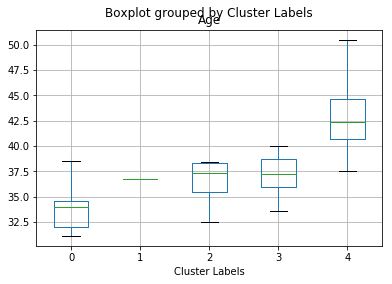

In [125]:
df_merged_explore.boxplot(column="Age", by="Cluster Labels")

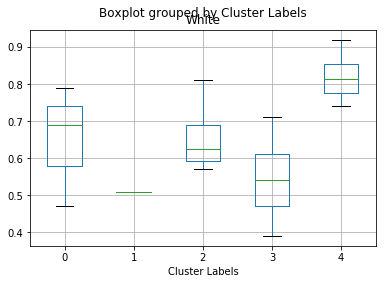

In [126]:
df_merged_explore.boxplot(column="White", by="Cluster Labels")

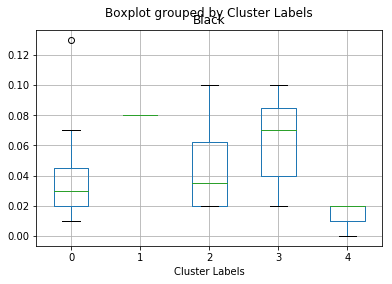

In [127]:
df_merged_explore.boxplot(column="Black", by="Cluster Labels")

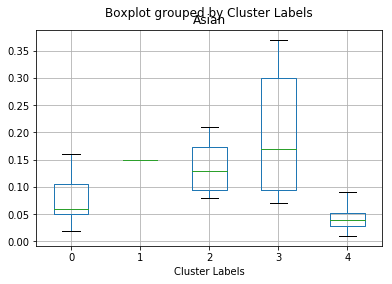

In [128]:
df_merged_explore.boxplot(column="Asian", by="Cluster Labels")

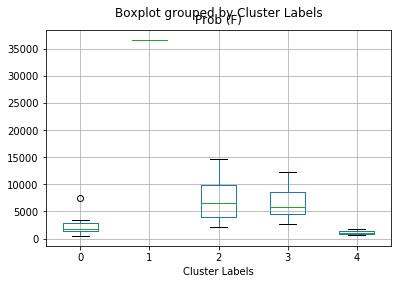

In [129]:
df_merged_explore.boxplot(column="Prob (F)", by="Cluster Labels")

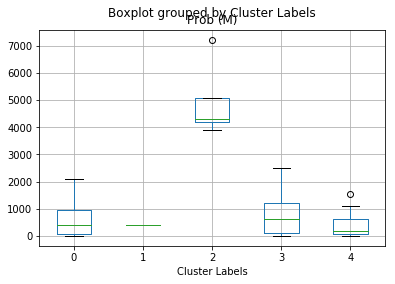

In [130]:
df_merged_explore.boxplot(column="Prob (M)", by="Cluster Labels")

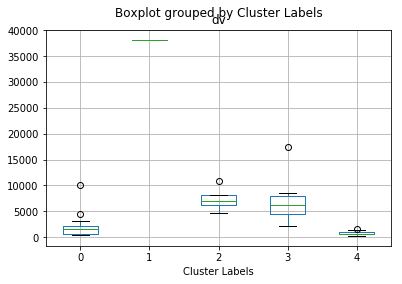

In [131]:
df_merged_explore.boxplot(column="dv", by="Cluster Labels")

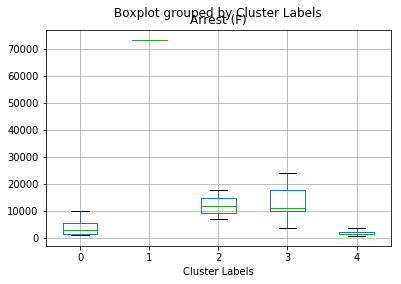

In [132]:
df_merged_explore.boxplot(column="Arrest (F)", by="Cluster Labels")

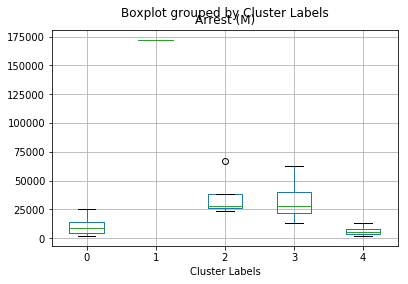

In [133]:
df_merged_explore.boxplot(column="Arrest (M)", by="Cluster Labels")

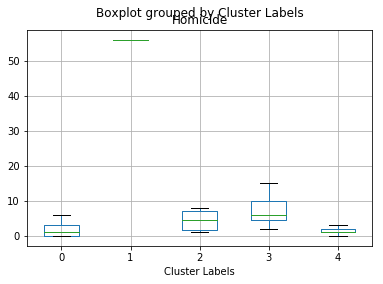

In [134]:
df_merged_explore.boxplot(column="Homicide", by="Cluster Labels")

In [135]:
df_merged_explore.loc[df_merged_explore['Cluster Labels'] == 4]

,Cluster Labels,County Name,Population,Age,White,Black,Indian,Asian,Hawaiian,Prob (F),Prob (M),dv,Arrest (F),Arrest (M),Homicide,Rape,Robbery,Assault,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Population1000
2,4,"Nevada County, California",99696.0,50.5,0.92,0.01,0.00,0.01,0.0,615,151,226,632,2307,2,0,0,11,Breakfast Spot,American Restaurant,Brewery,Dessert Shop,Coffee Shop,99.696
3,4,"Shasta County, California",180040.0,41.5,0.85,0.01,0.02,0.03,0.0,1469,1,642,2130,7502,3,2,16,96,Coffee Shop,Mexican Restaurant,Ice Cream Shop,Gay Bar,Restaurant,180.040
12,4,"Mendocino County, California",87606.0,42.9,0.83,0.00,0.04,0.02,0.0,996,231,414,1063,3237,1,0,4,15,State / Provincial Park,New American Restaurant,Winery,Grocery Store,Nature Preserve,87.606
14,4,"Placer County, California",393149.0,42.3,0.82,0.02,0.01,0.08,0.0,1765,1554,808,2631,6477,1,0,23,36,Ski Area,Brewery,Farm,Café,Coffee Shop,393.149
18,4,"Lake County, California",64382.0,44.0,0.74,0.02,0.05,0.01,0.0,601,99,572,1015,3217,1,0,3,13,Coffee Shop,Italian Restaurant,Café,Breakfast Spot,Mexican Restaurant,64.382
19,4,"Sonoma County, California",499942.0,42.4,0.74,0.02,0.01,0.04,0.0,1505,0,1640,3536,13153,0,3,15,57,Grocery Store,Winery,Park,Coffee Shop,Wine Bar,499.942
28,4,"Humboldt County, California",136373.0,38.5,0.78,0.01,0.05,0.03,0.0,1149,27,765,1545,5577,1,0,8,20,Bagel Shop,Brewery,Restaurant,Coffee Shop,Ice Cream Shop,136.373
30,4,"Napa County, California",139417.0,41.1,0.76,0.02,0.01,0.09,0.0,660,1095,497,1230,3197,1,1,2,61,Winery,Hotel,New American Restaurant,Vineyard,Grocery Store,139.417
31,4,"Butte County, California",231256.0,37.5,0.81,0.02,0.01,0.04,0.0,891,249,1359,2239,8853,3,6,12,49,Bathing Area,Pizza Place,Park,Italian Restaurant,Coffee Shop,231.256
32,4,"El Dorado County, California",190678.0,46.6,0.89,0.01,0.00,0.05,0.0,858,99,1275,1317,3508,2,0,3,28,Farm,American Restaurant,Brewery,Grocery Store,Vineyard,190.678
